# Datasets

The base datasets we are going to work with contain the daily counts for several metrics, both per state and full US aggregated. Our target is going to be to predict the positives per day for the whole of the US.

In [1]:
import json
import requests
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

### States Current

In [3]:
url = "https://covidtracking.com/api/states"

response = requests.request("GET", url, headers={}, data={})

json_data = json.loads(response.text)
df = pd.DataFrame(json_data)
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df.set_index('date',inplace=True)
df.head(4)

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-07-25,AK,2868,202198,NaN,38.0,NaN,NaN,NaN,2.0,NaN,...,205066,1,0,5f2c5ca08d30c7fa77bfd21e75840efa1435f3cd,0,0,0,0,0,
2020-07-25,AL,78130,563481,NaN,1425.0,9157.0,NaN,1069.0,NaN,567.0,...,641611,18,0,8d1bda5ff4d4985142b55becccbea692e56abfda,0,0,0,0,0,
2020-07-25,AR,37249,424215,NaN,497.0,2361.0,NaN,NaN,109.0,329.0,...,461464,0,0,a3452a99a044e2e12f08a21b96dbef0d9362e5c2,0,0,0,0,0,
2020-07-25,AS,0,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,0d7a633be32b1ba4de5e5b83e4541495d606dc79,0,0,0,0,0,


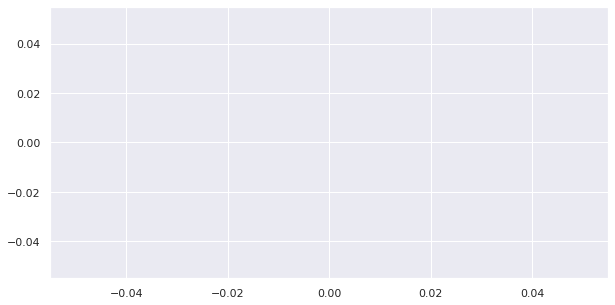

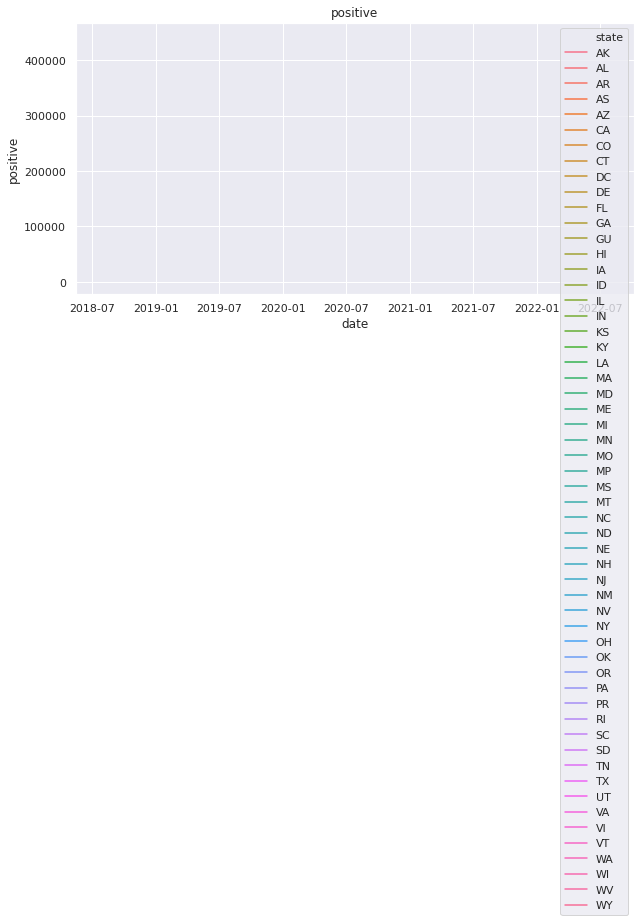

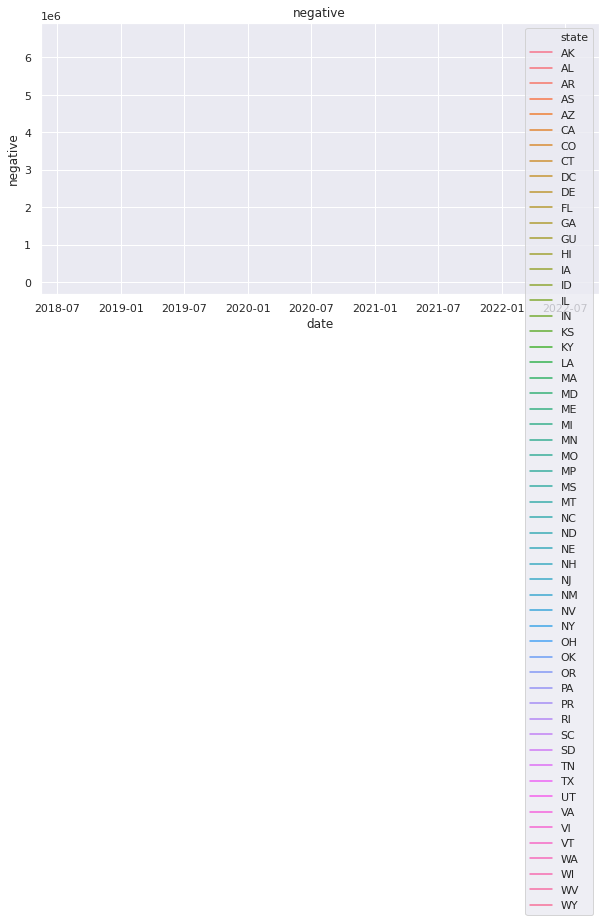

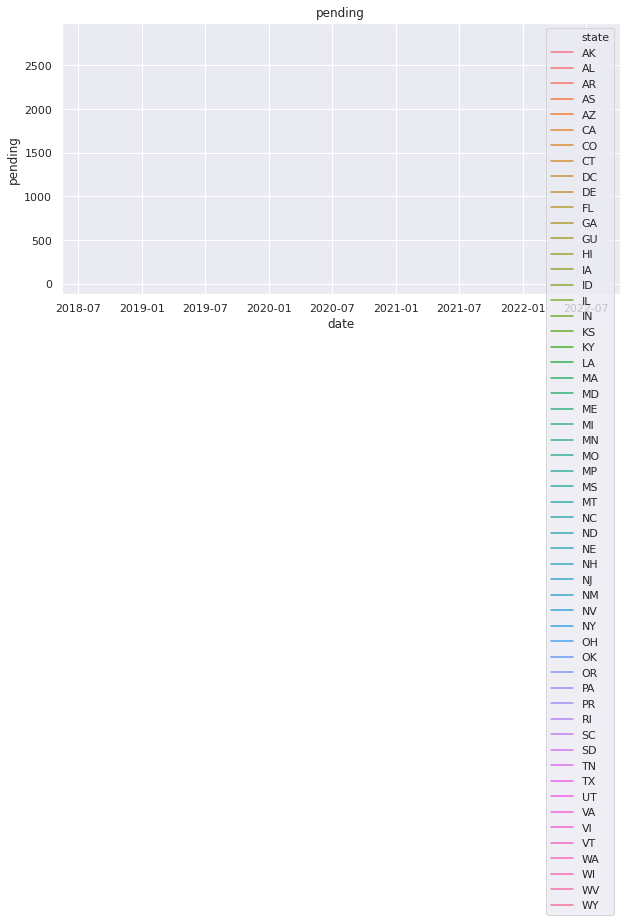

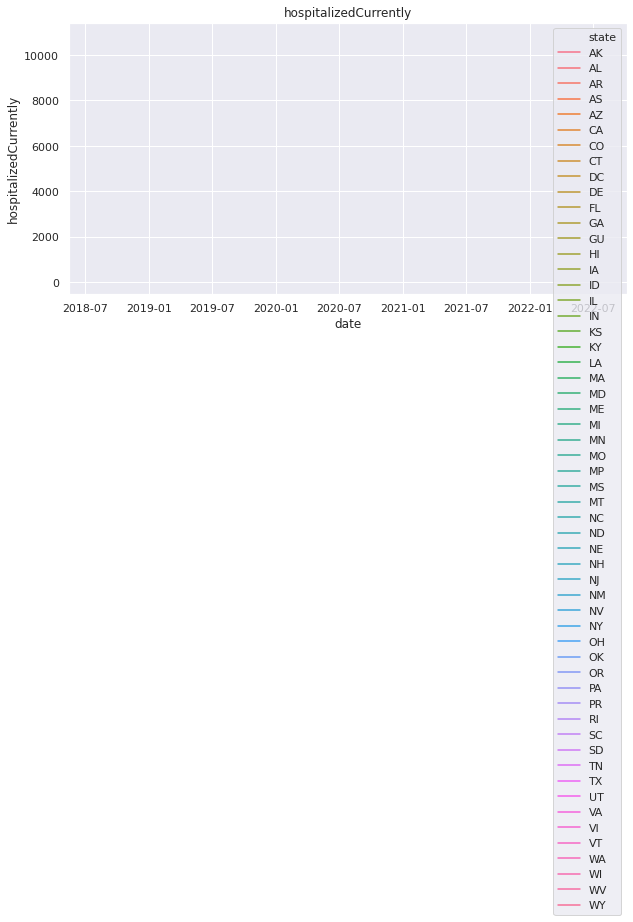

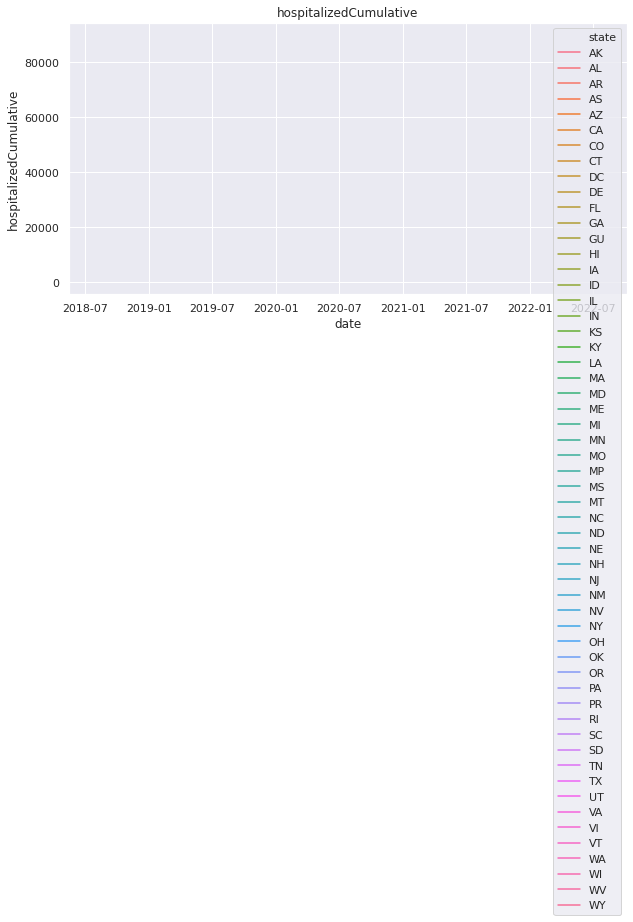

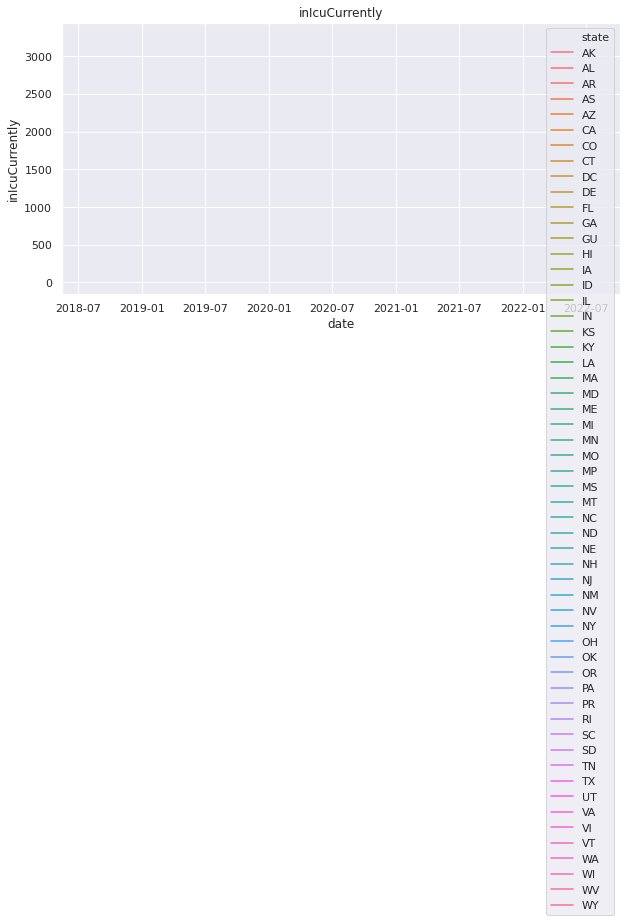

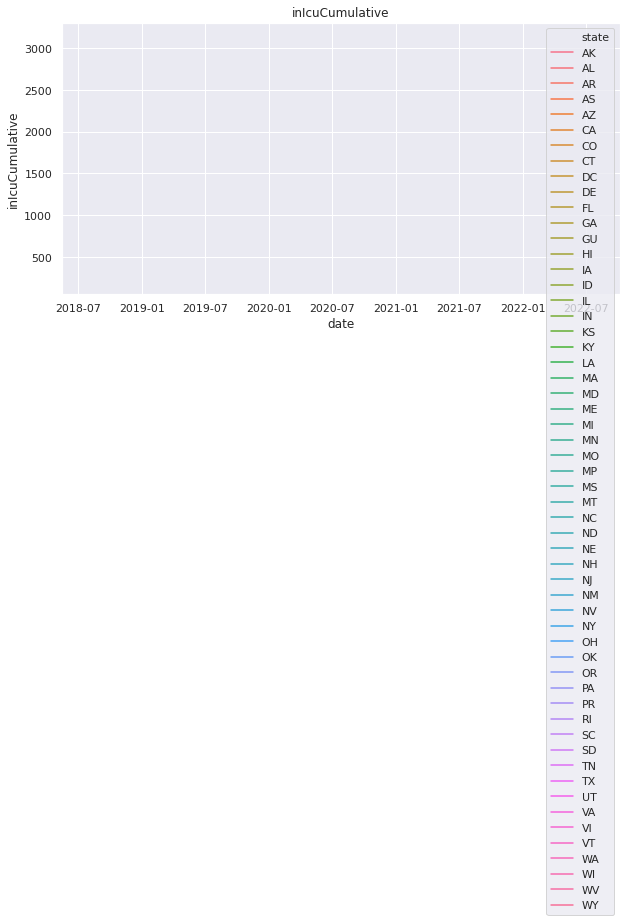

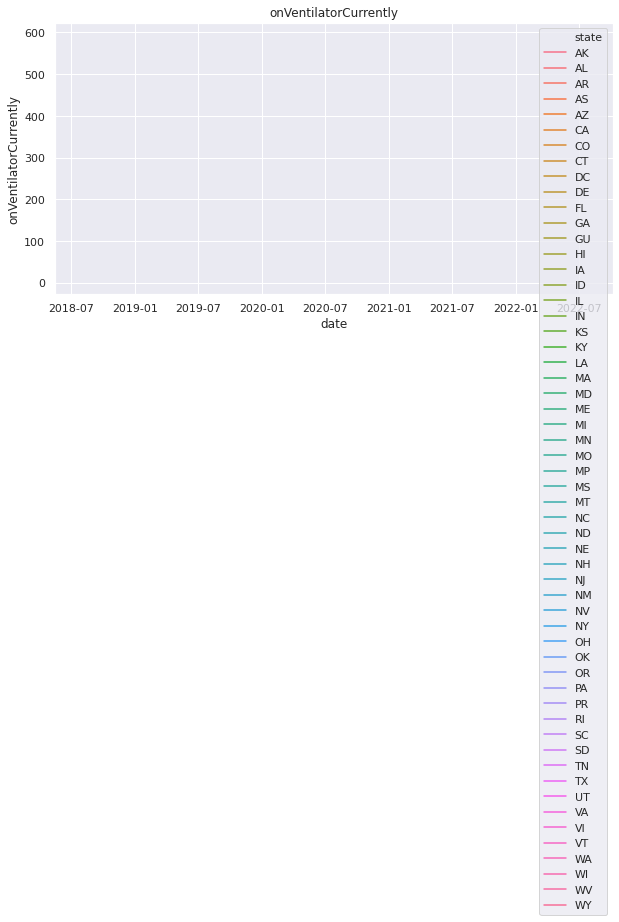

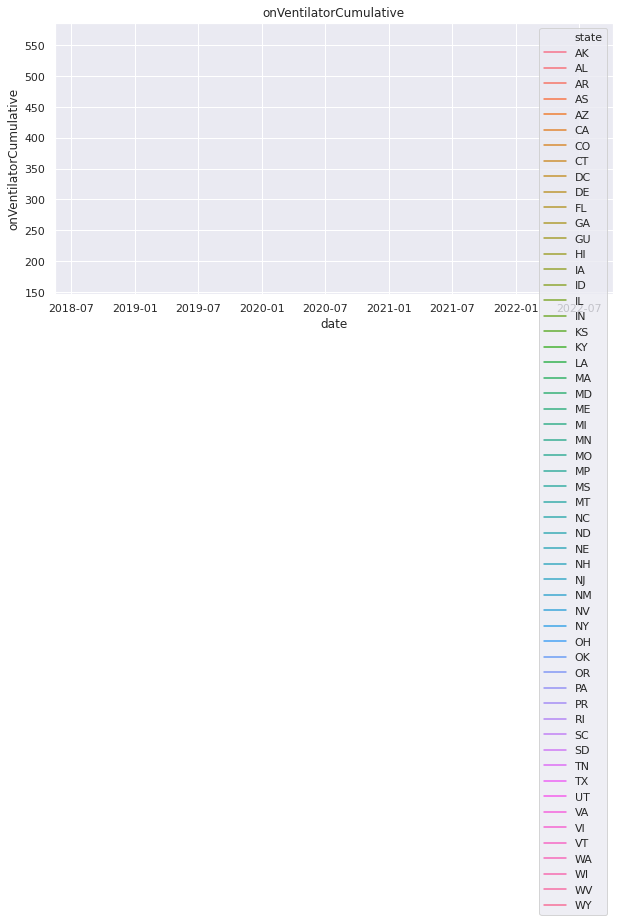

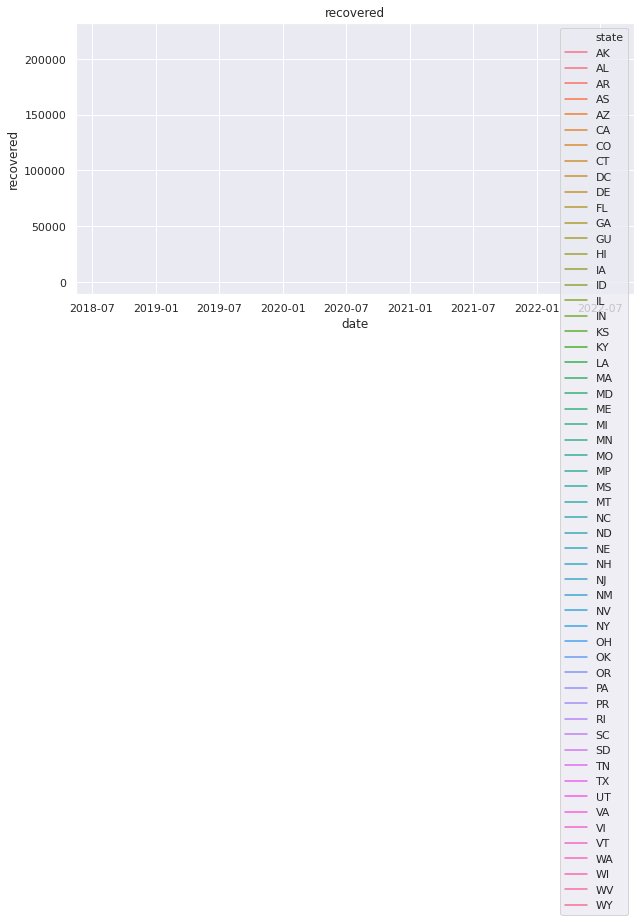

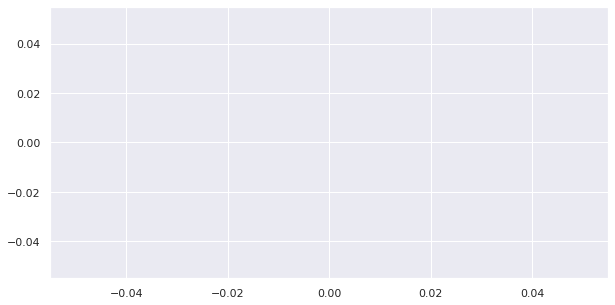

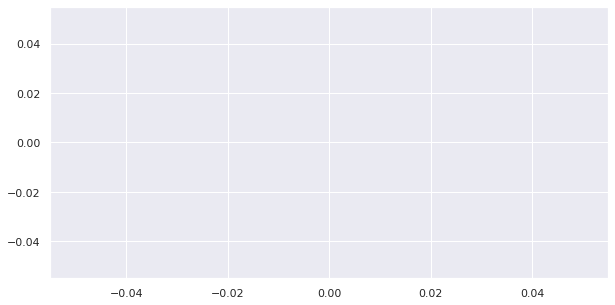

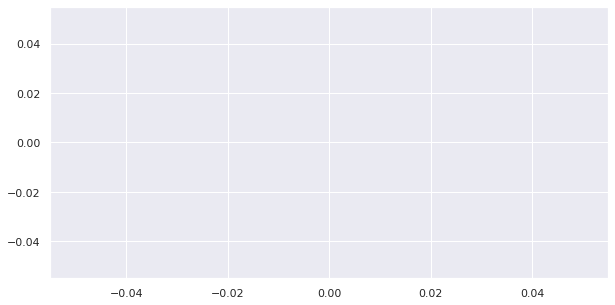

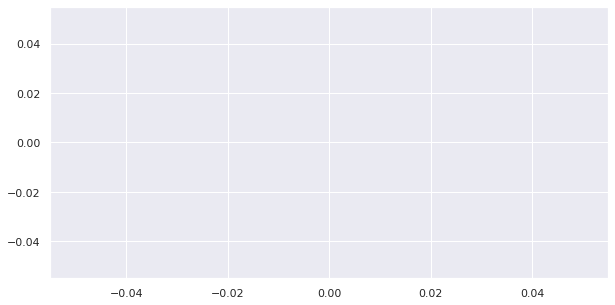

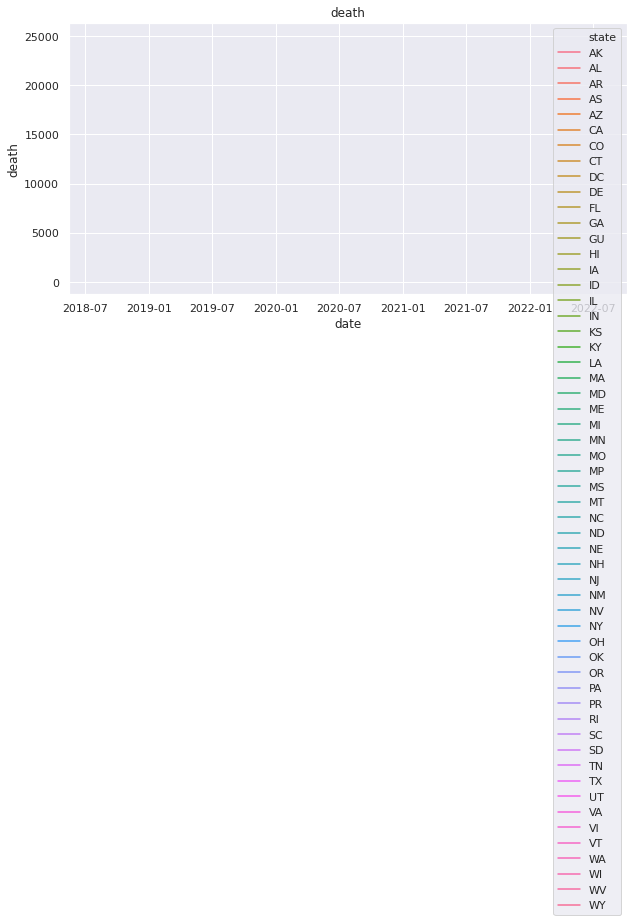

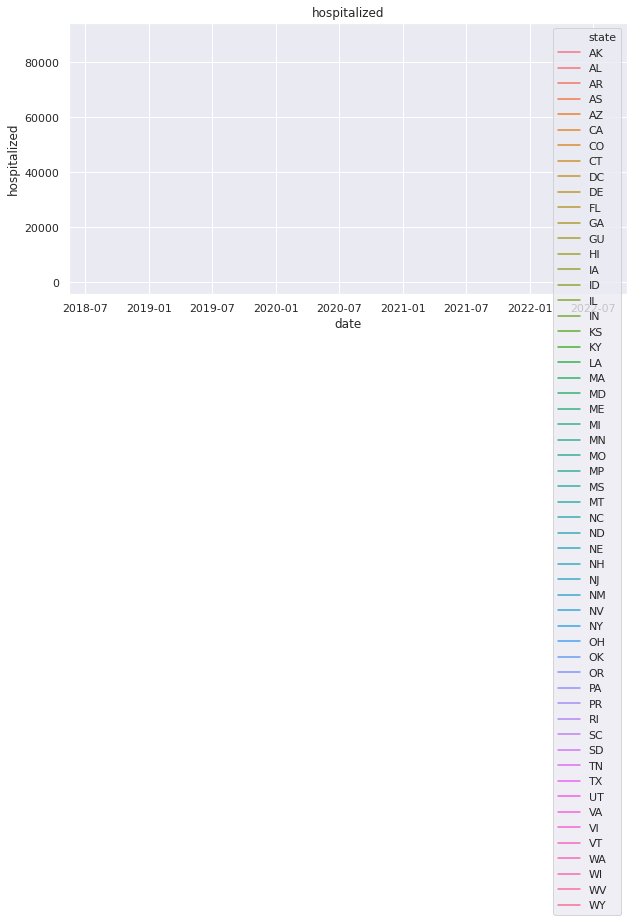

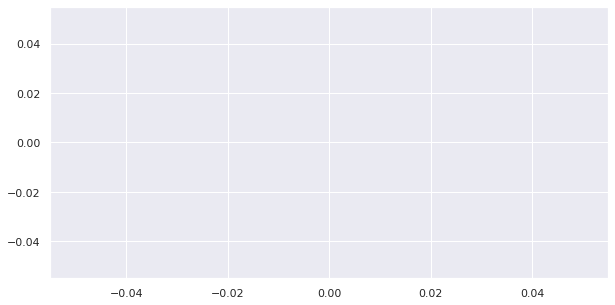

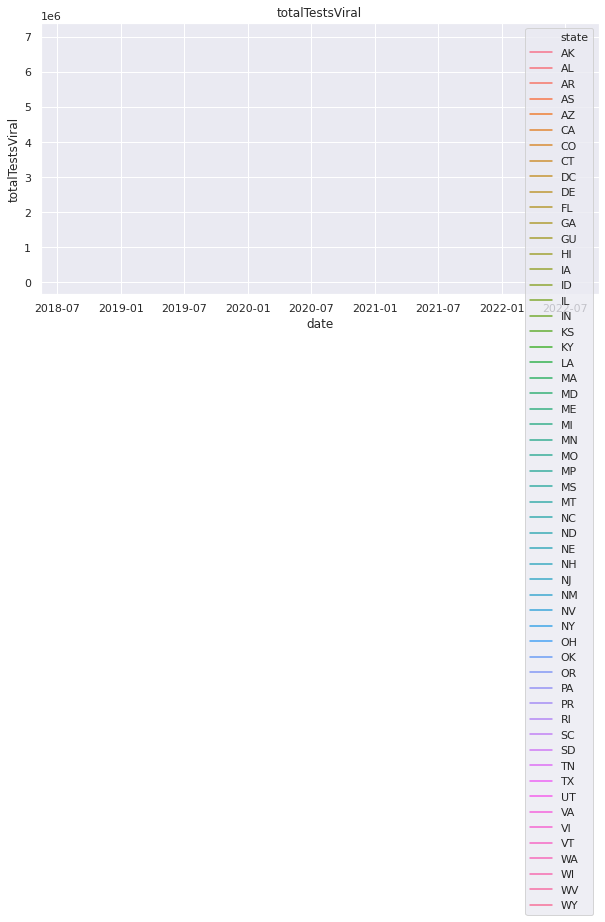

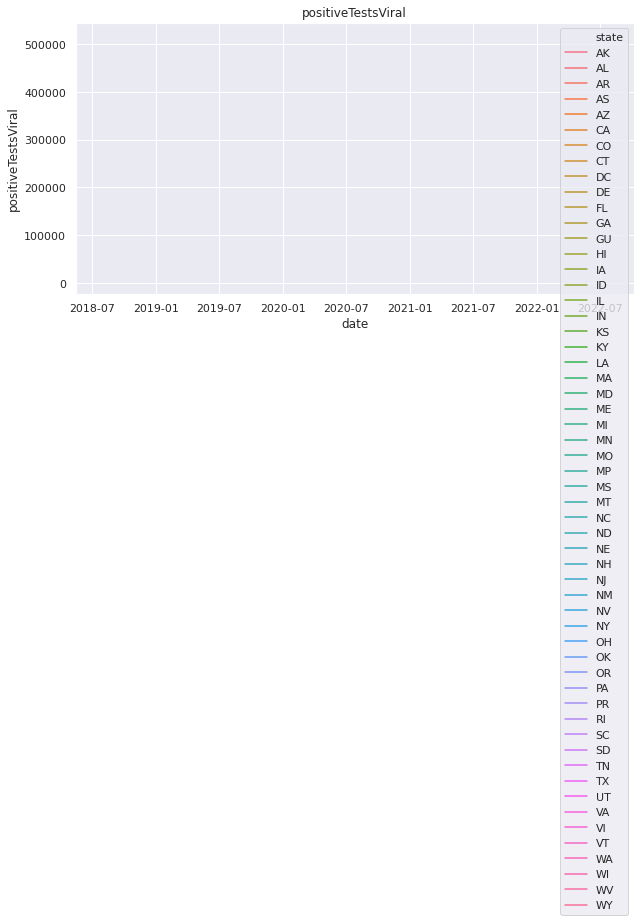

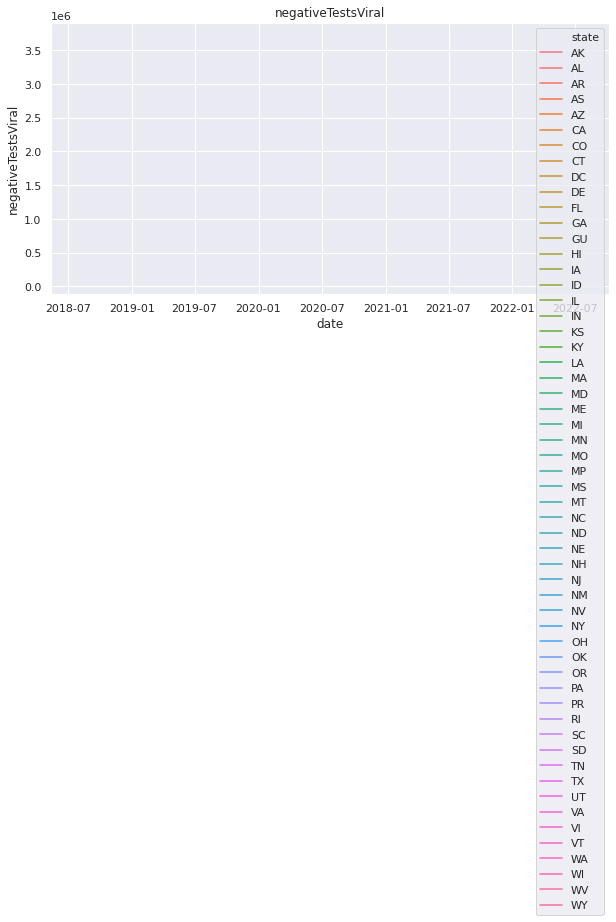

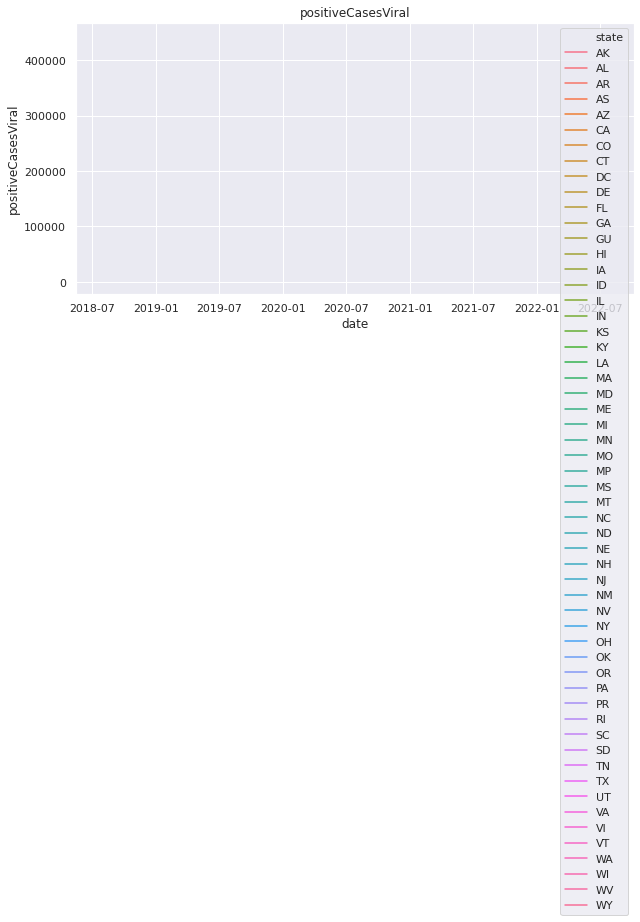

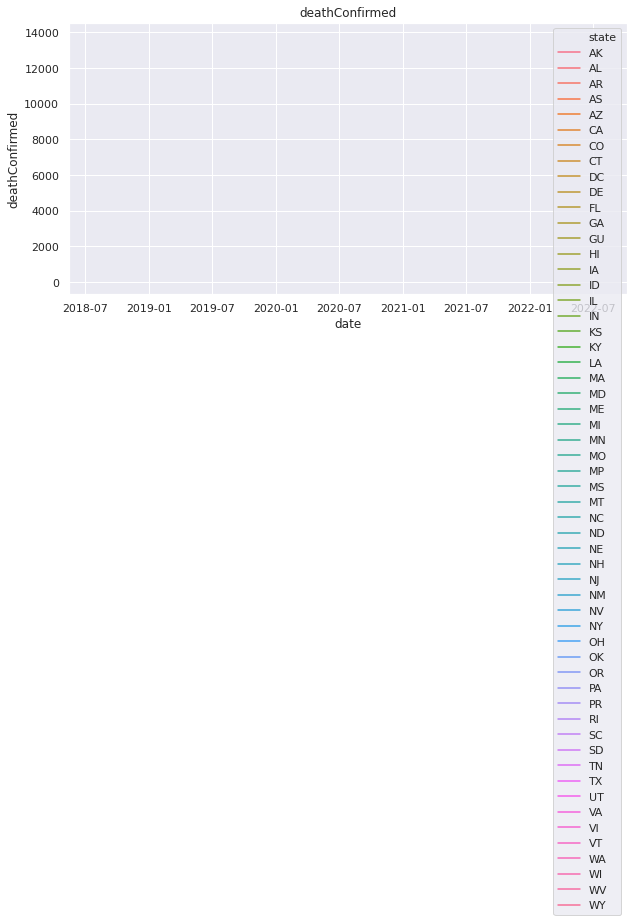

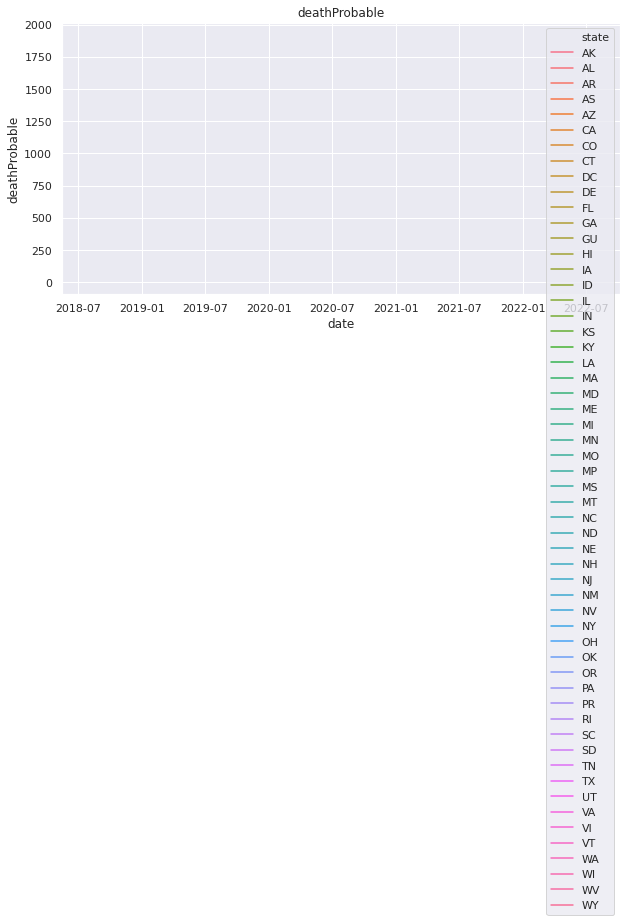

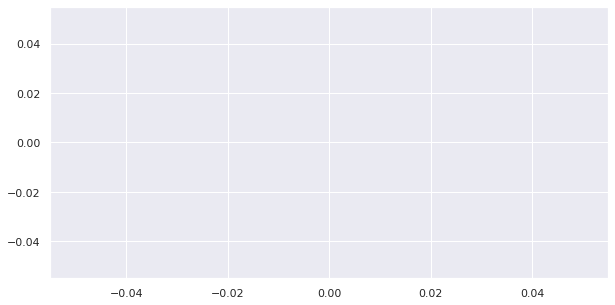

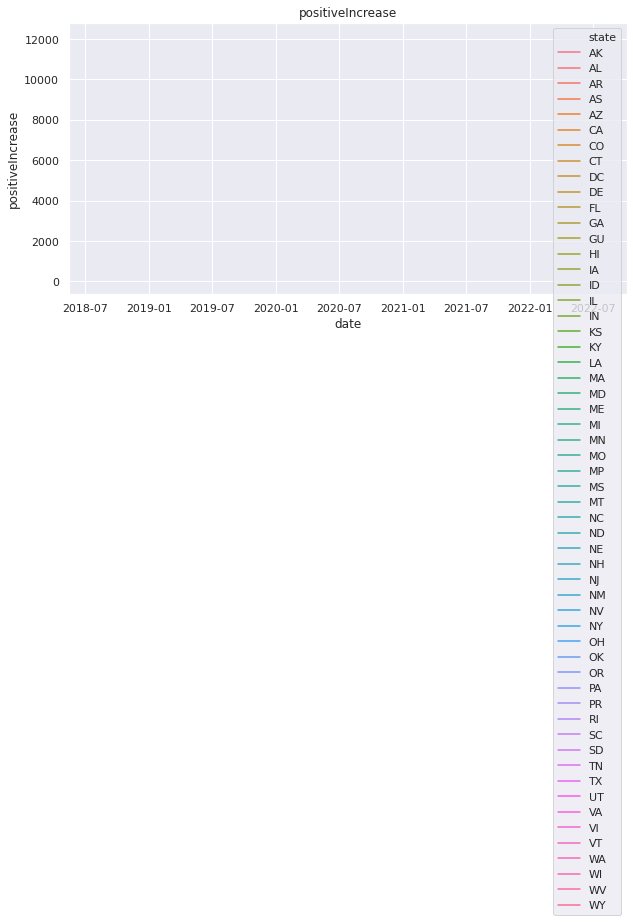

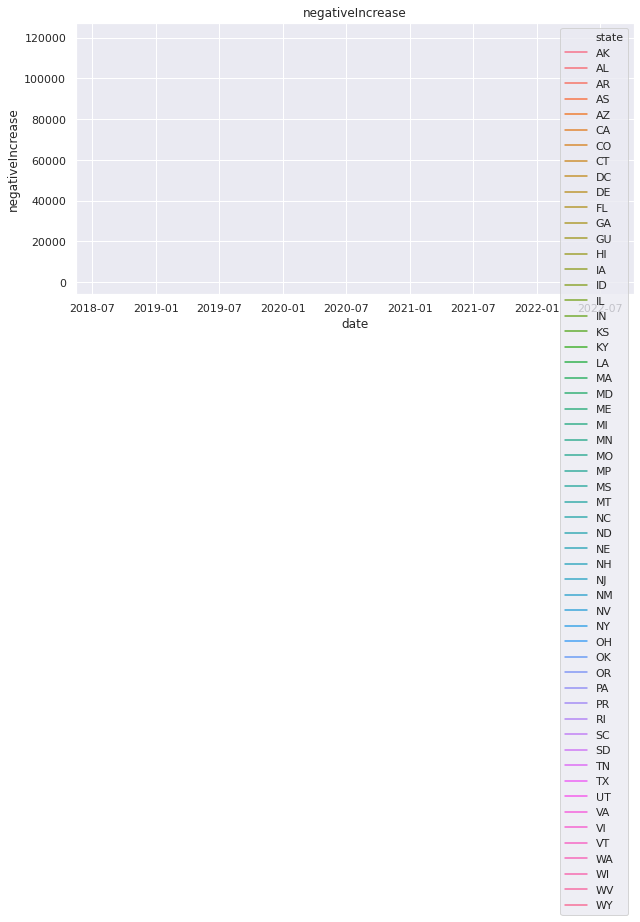

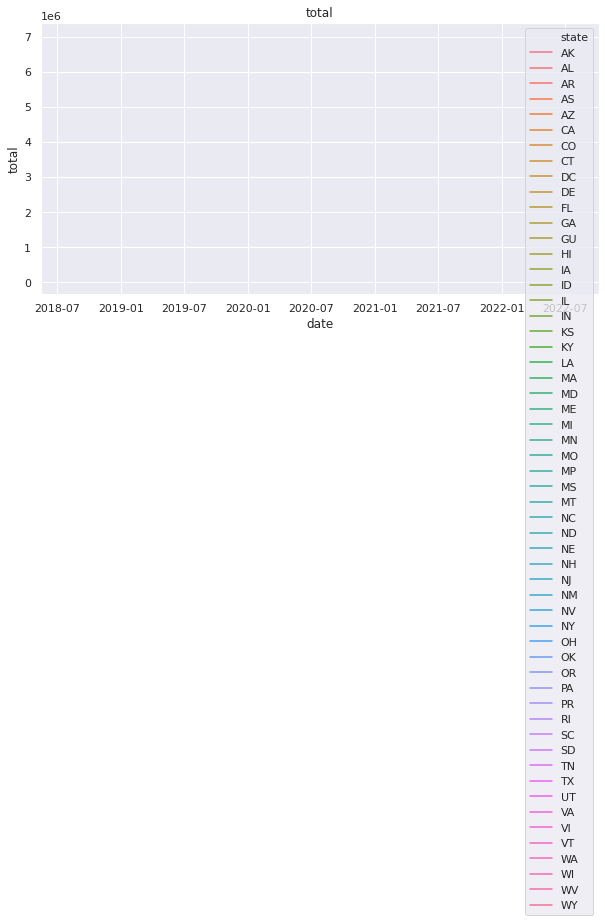

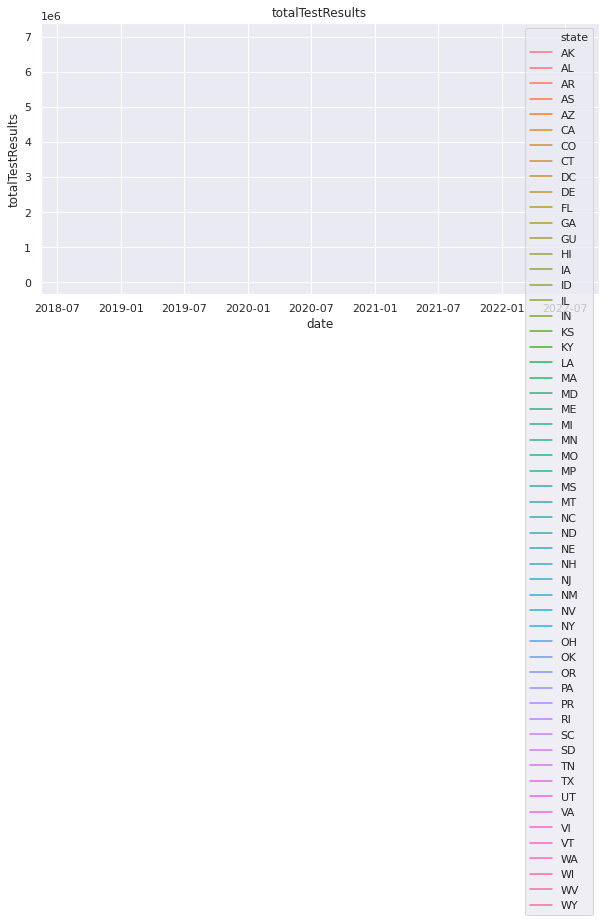

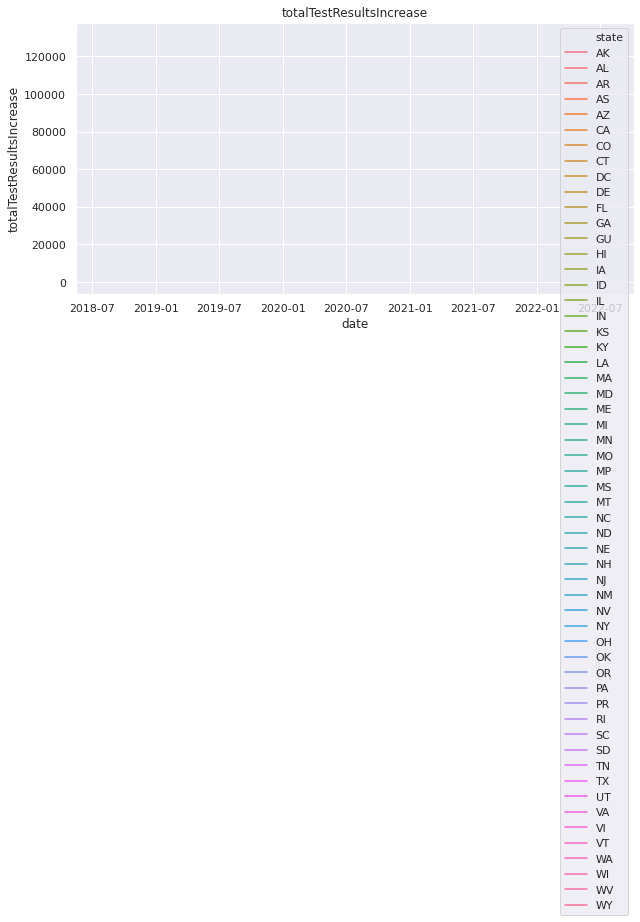

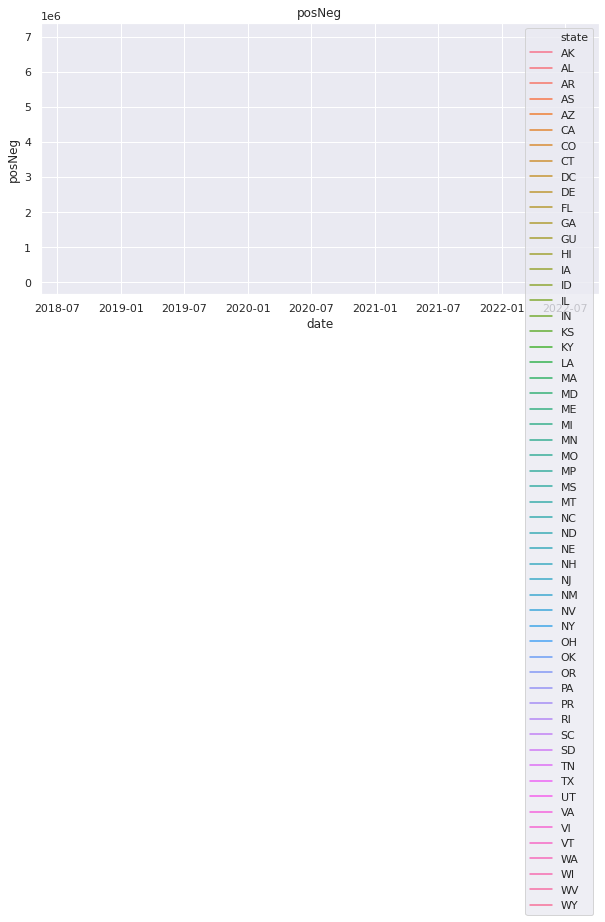

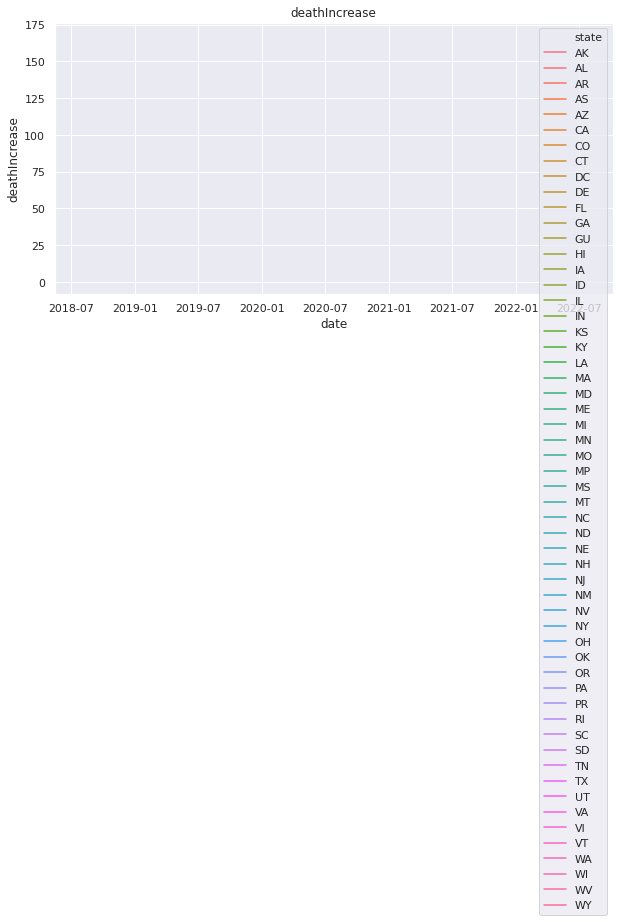

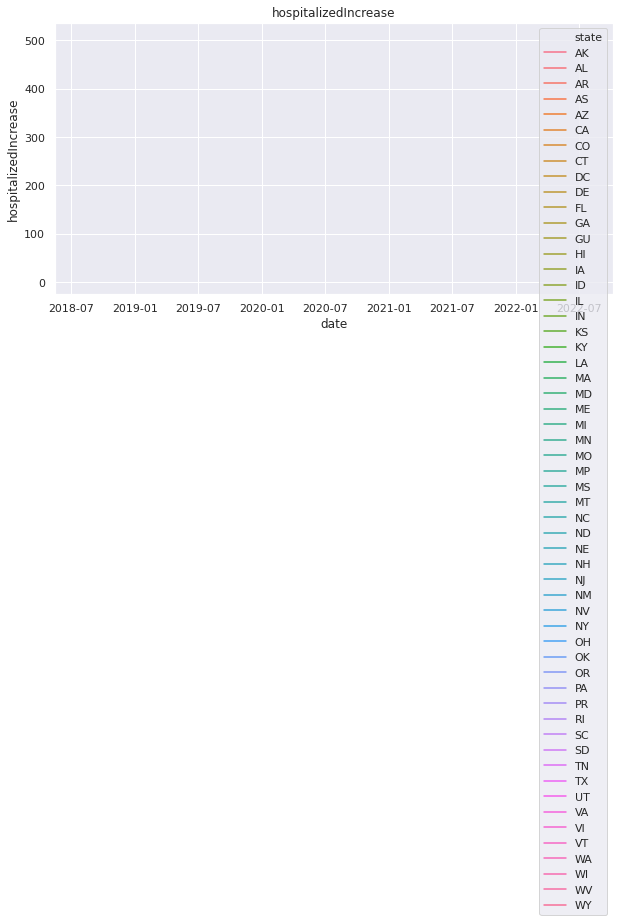

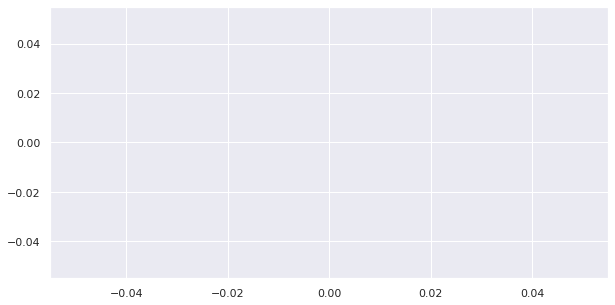

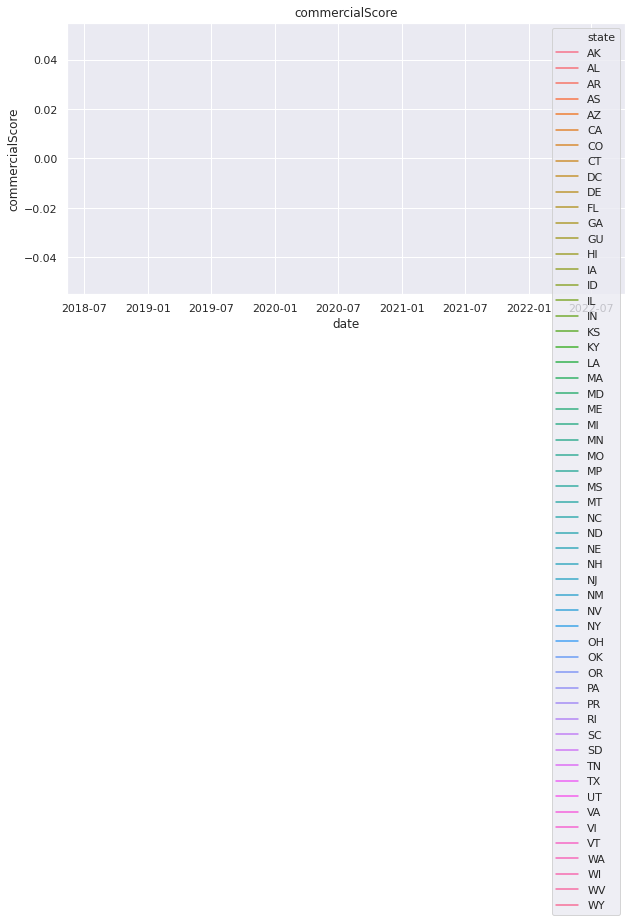

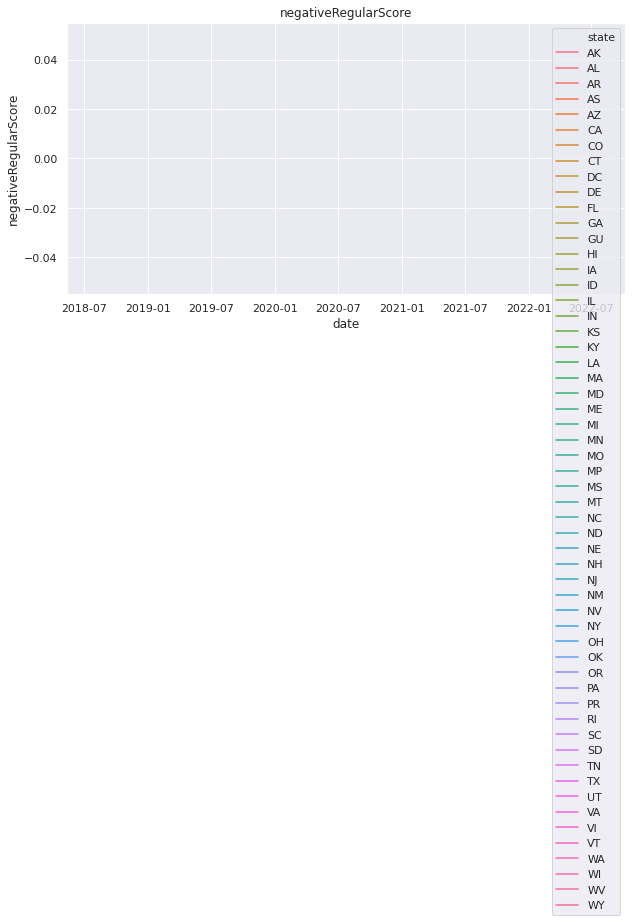

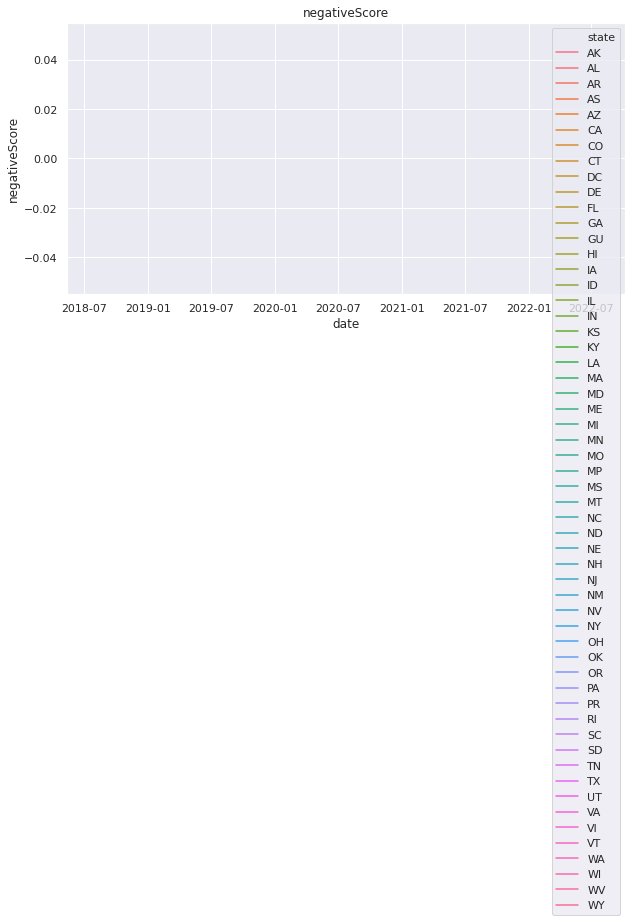

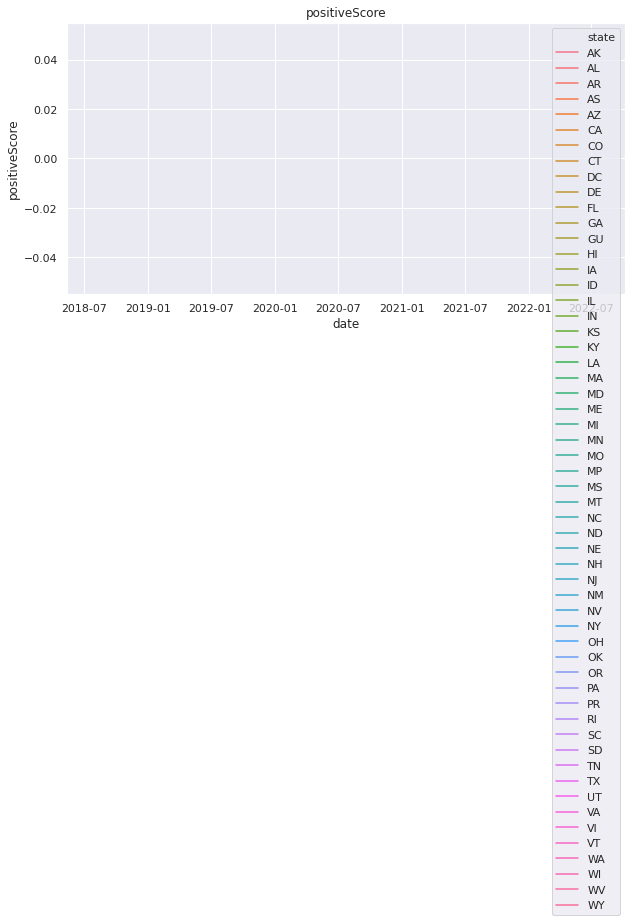

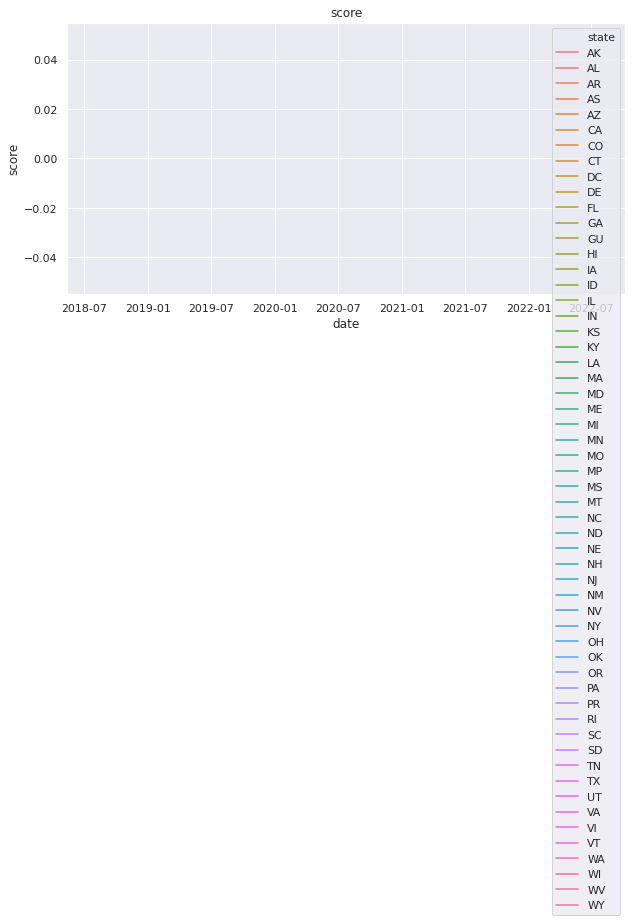

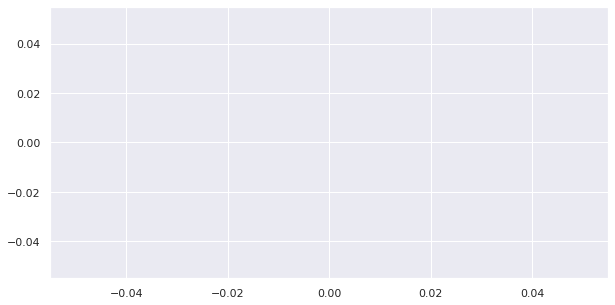

In [4]:
for col in df.columns:
    try:
        plt.figure(figsize=(10,5))
        sns.lineplot(x='date', y=col, hue='state', data=df.reset_index())

        plt.title(col)
    except:
        pass

### States Daily

In [5]:
url = "https://covidtracking.com/api/states/daily"

response = requests.request("GET", url, headers={}, data={})

json_data = json.loads(response.text)
df = pd.DataFrame(json_data)
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
df.set_index('date',inplace=True)
df.head()

,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
date,,,,,,,,,,,,,,,,,,,,,
2020-07-25,AK,2868.0,202198.0,NaN,38.0,NaN,NaN,NaN,2.0,NaN,...,205066,1,0,5f2c5ca08d30c7fa77bfd21e75840efa1435f3cd,0,0,0,0,0,
2020-07-25,AL,78130.0,563481.0,NaN,1425.0,9157.0,NaN,1069.0,NaN,567.0,...,641611,18,0,8d1bda5ff4d4985142b55becccbea692e56abfda,0,0,0,0,0,
2020-07-25,AR,37249.0,424215.0,NaN,497.0,2361.0,NaN,NaN,109.0,329.0,...,461464,0,0,a3452a99a044e2e12f08a21b96dbef0d9362e5c2,0,0,0,0,0,
2020-07-25,AS,0.0,1037.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1037,0,0,0d7a633be32b1ba4de5e5b83e4541495d606dc79,0,0,0,0,0,
2020-07-25,AZ,160041.0,697568.0,NaN,2758.0,7627.0,842.0,NaN,594.0,NaN,...,857609,144,166,086654feacad18d4c1af2297f08891f51d9cbcc2,0,0,0,0,0,


In [6]:
df.sort_values('death',ascending=False)[['state','death']]['state'].unique()

array(['NY', 'NJ', 'MA', 'CA', 'IL', 'PA', 'MI', 'FL', 'TX', 'CT', 'LA',
       'GA', 'MD', 'OH', 'AZ', 'IN', 'VA', 'NC', 'CO', 'MN', 'WA', 'MS',
       'SC', 'AL', 'MO', 'RI', 'TN', 'WI', 'IA', 'NV', 'KY', 'NM', 'DC',
       'DE', 'OK', 'NH', 'AR', 'KS', 'NE', 'OR', 'UT', 'PR', 'ID', 'SD',
       'ME', 'WV', 'ND', 'VT', 'MT', 'HI', 'WY', 'AK', 'VI', 'GU', 'MP',
       'AS'], dtype=object)

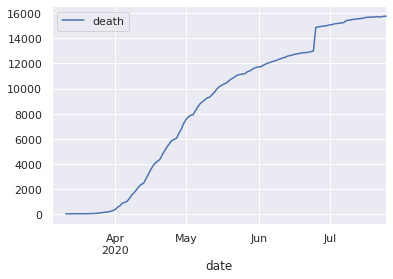

In [7]:
df.loc[df['state']=='NJ',['death']].plot();

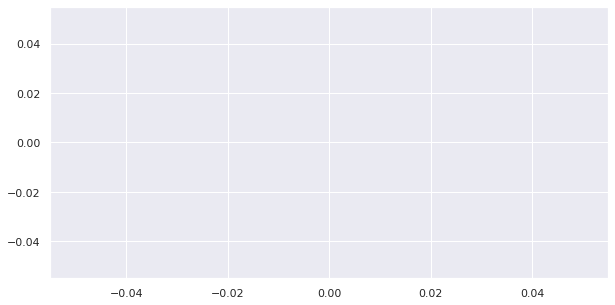

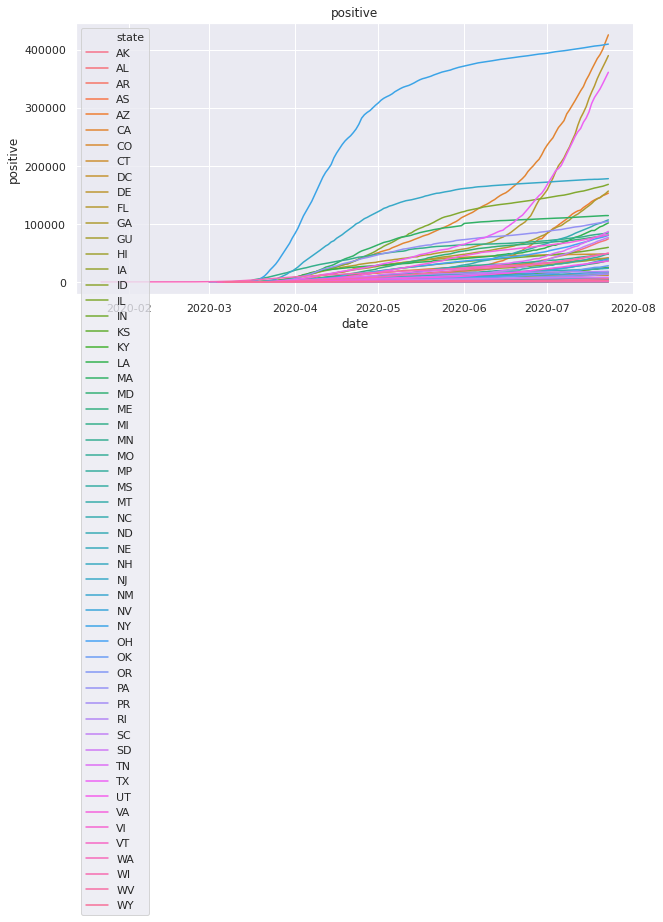

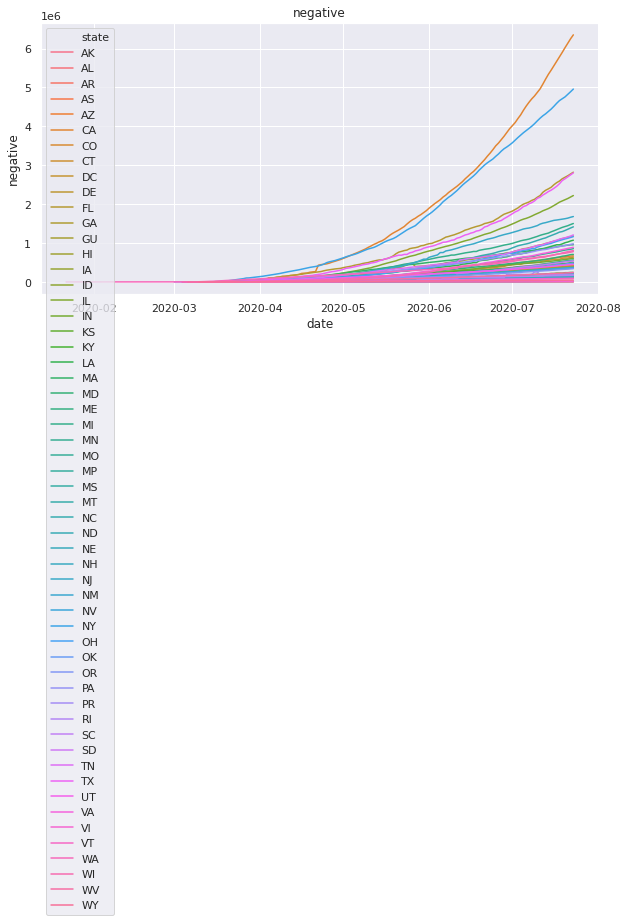

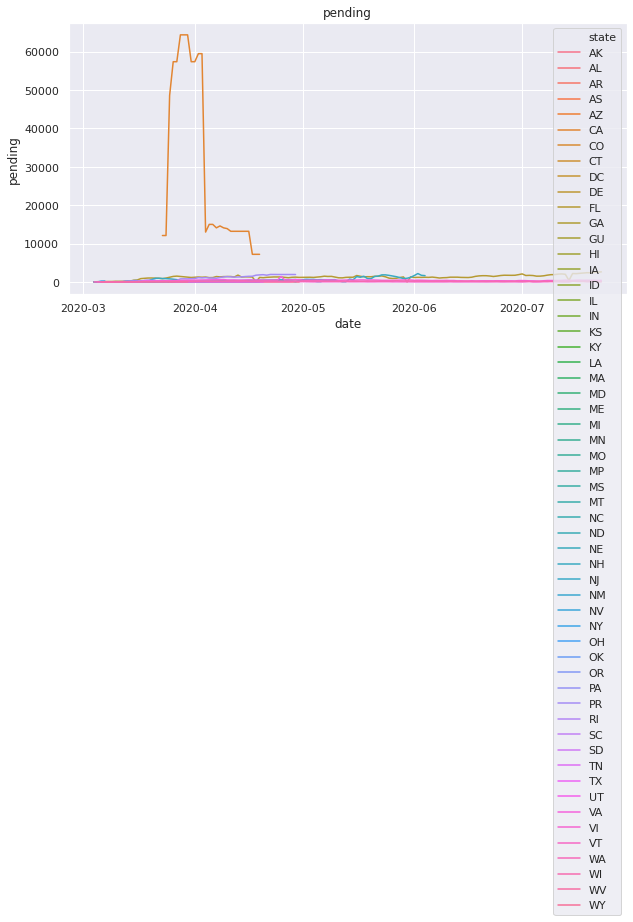

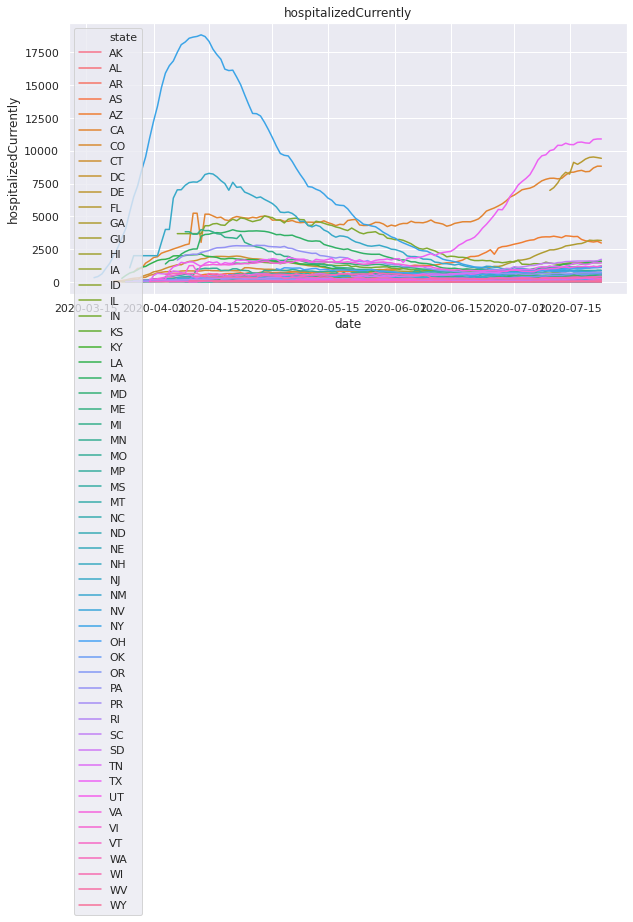

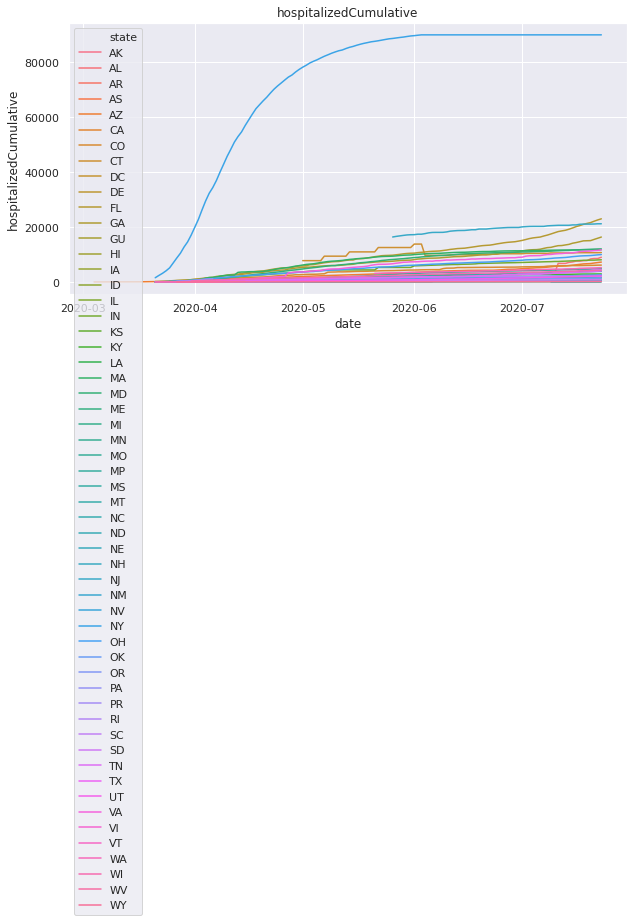

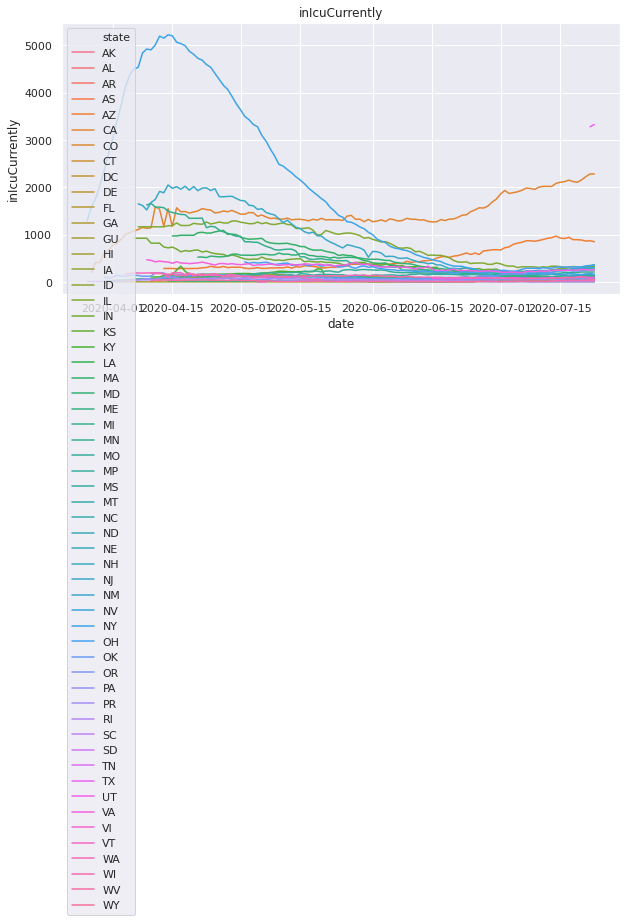

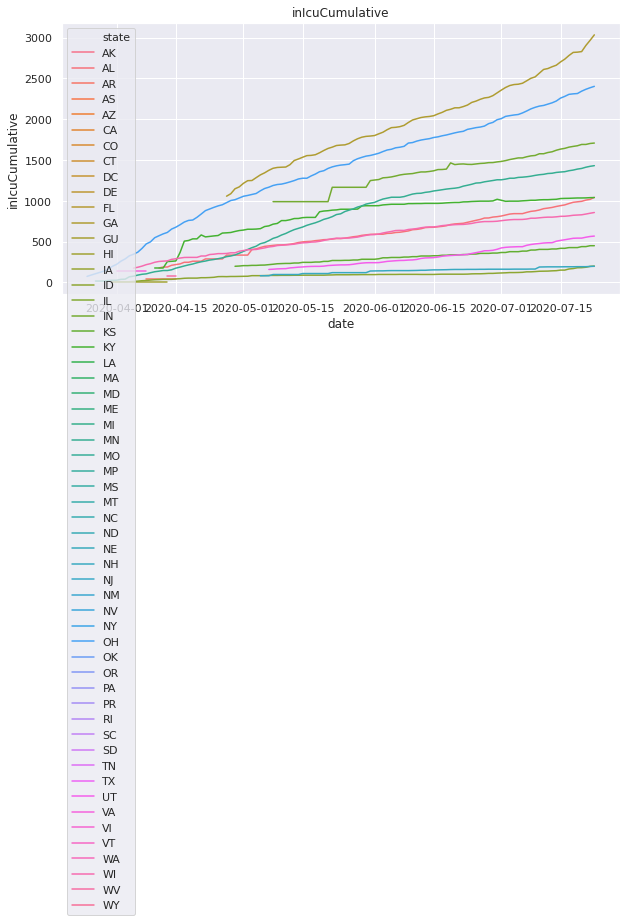

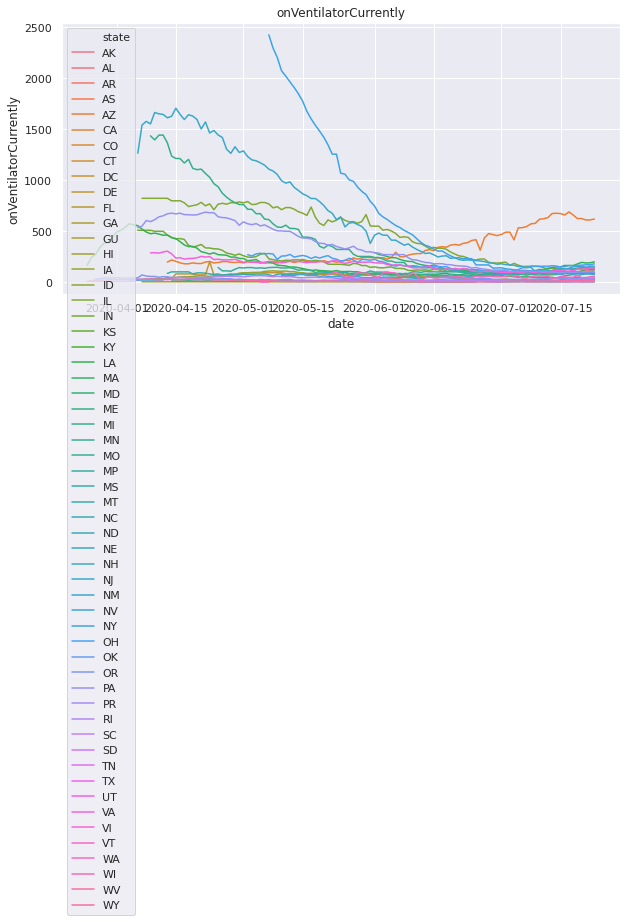

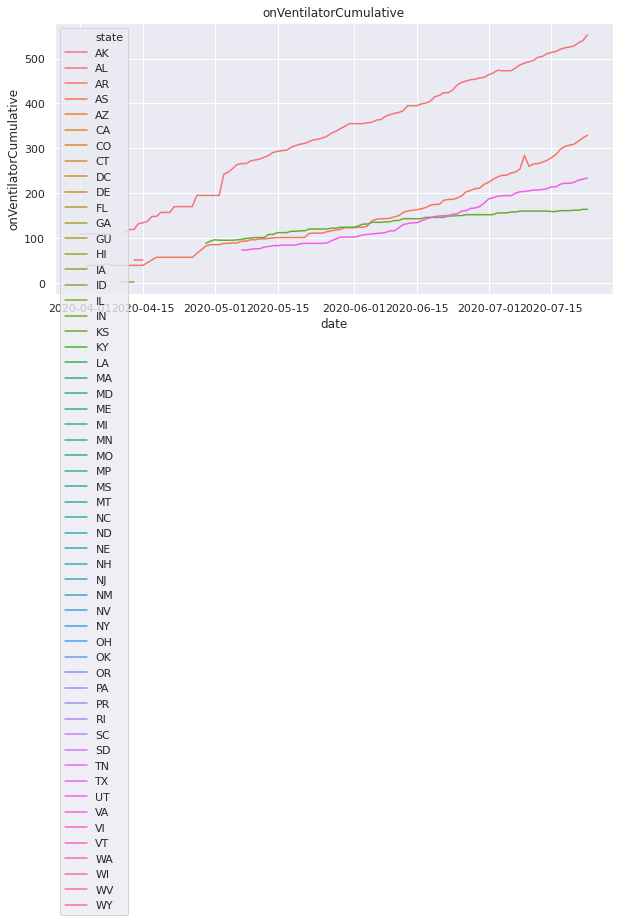

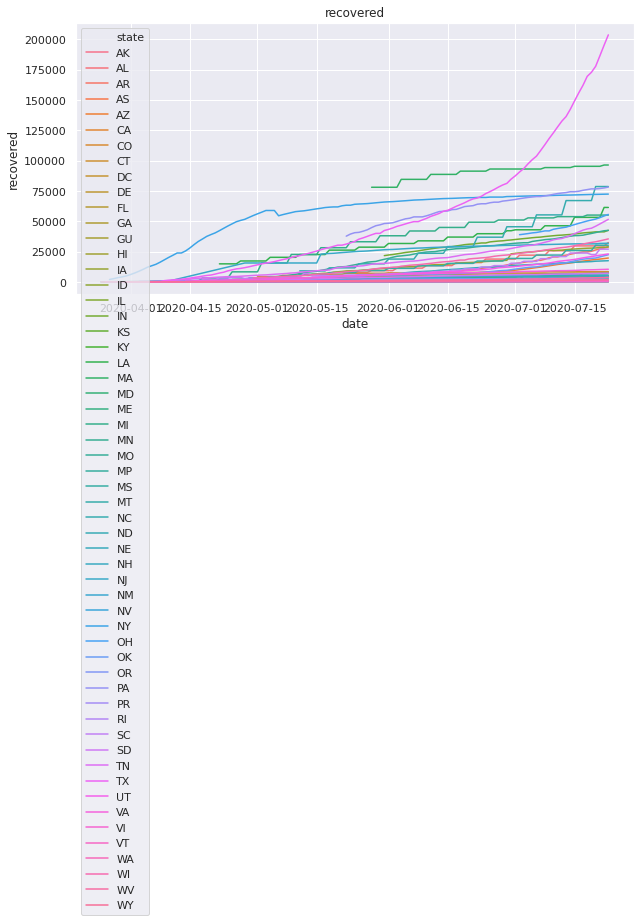

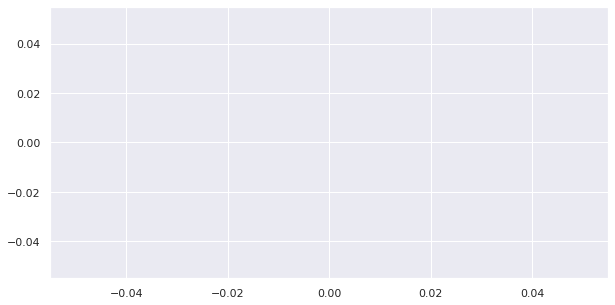

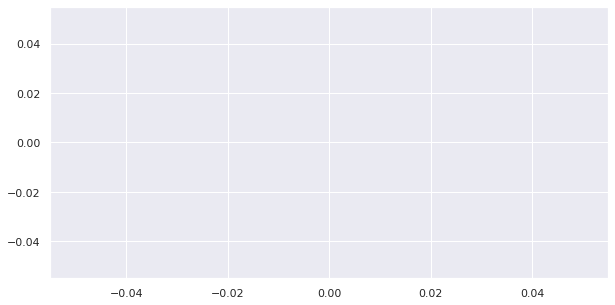

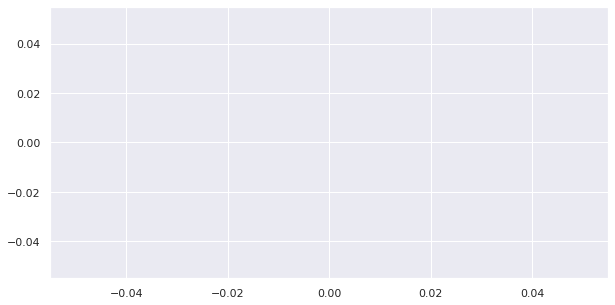

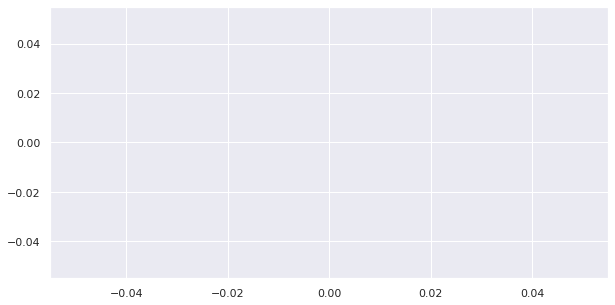

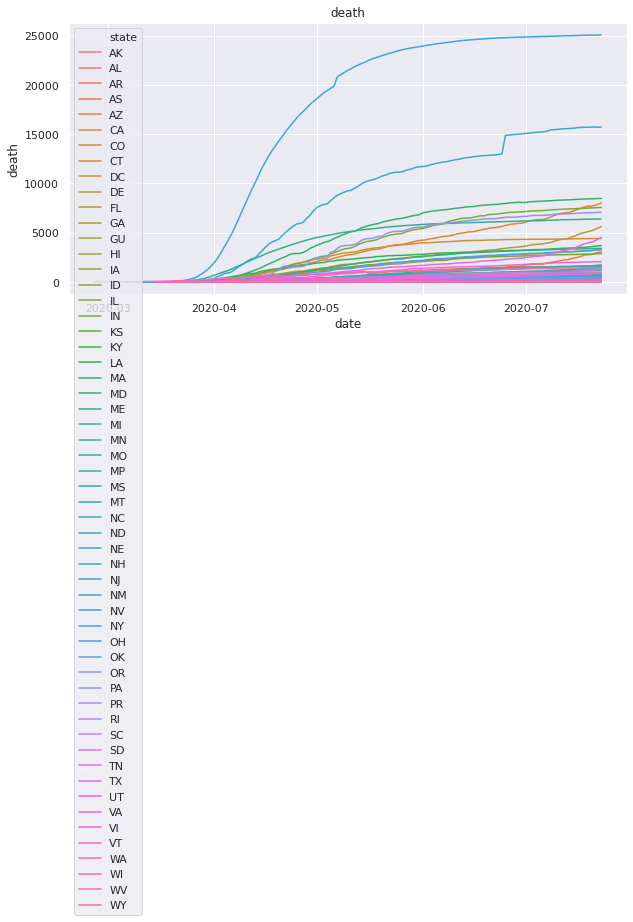

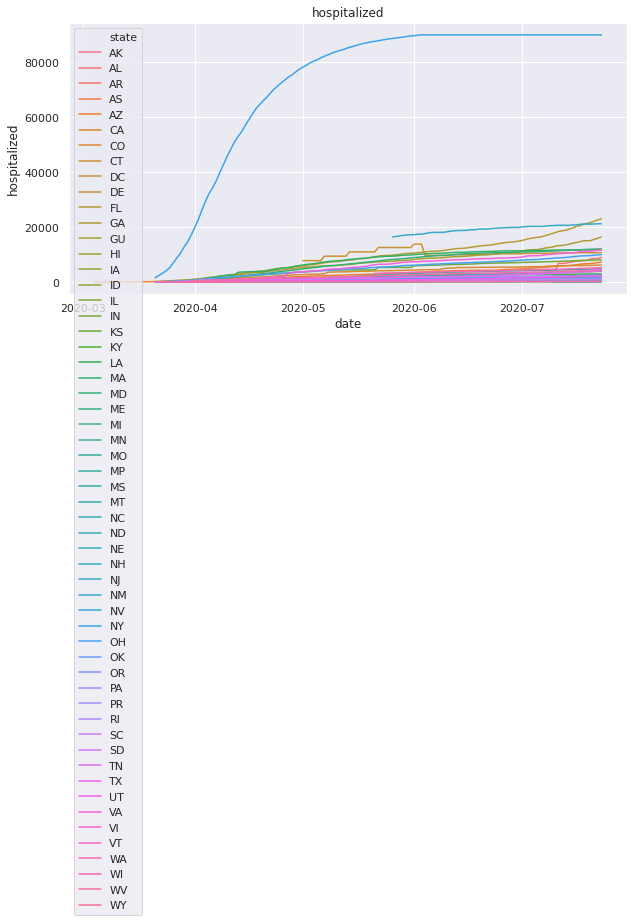

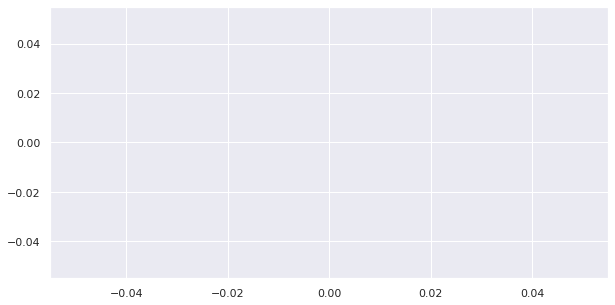

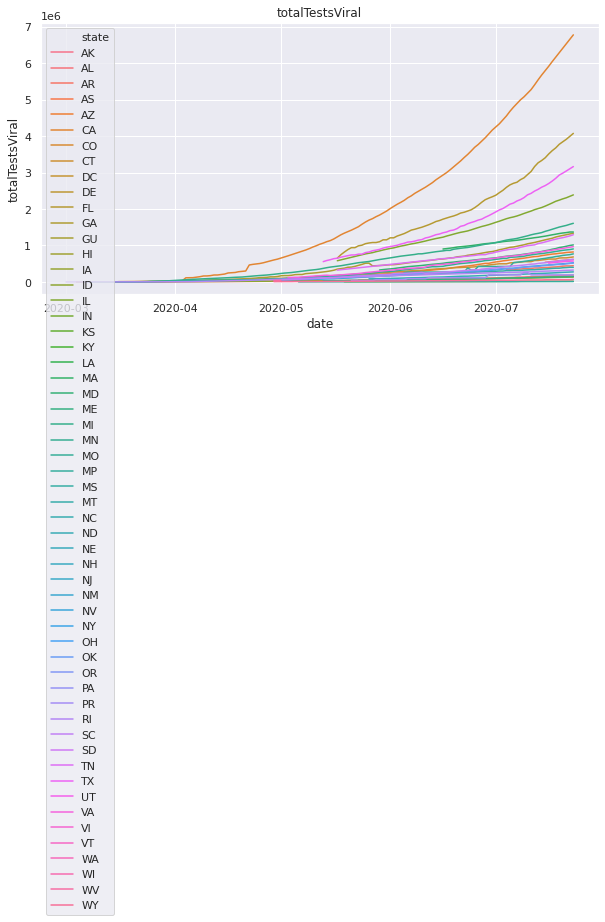

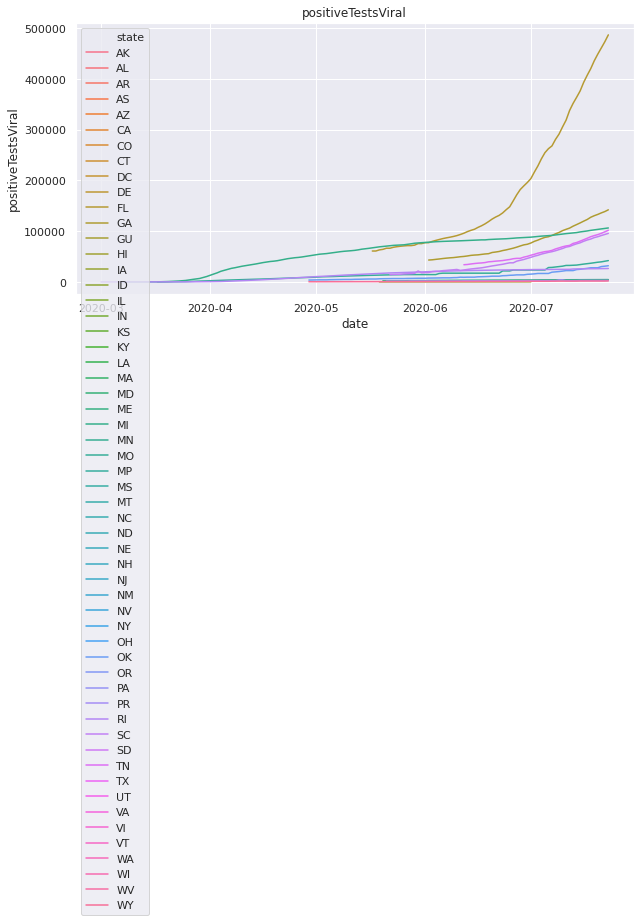

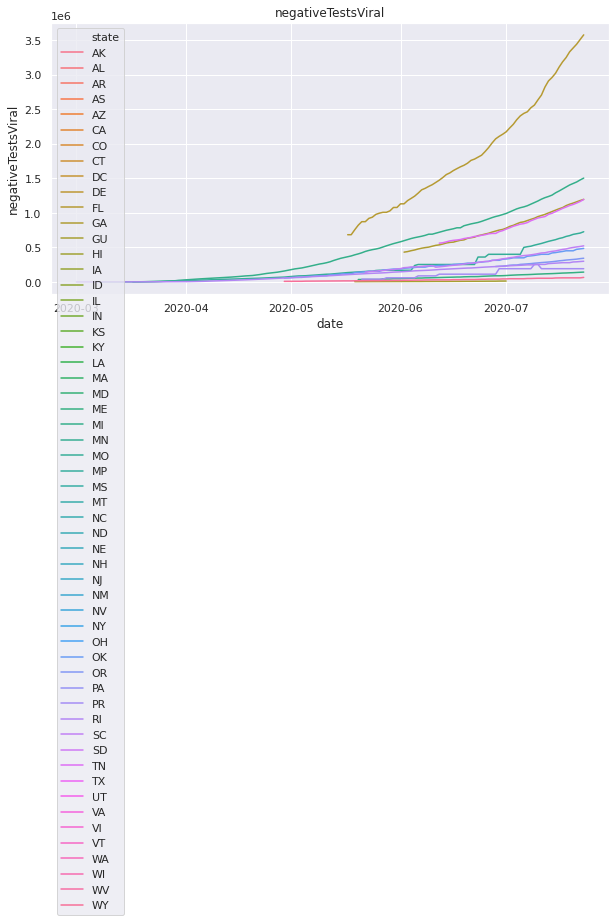

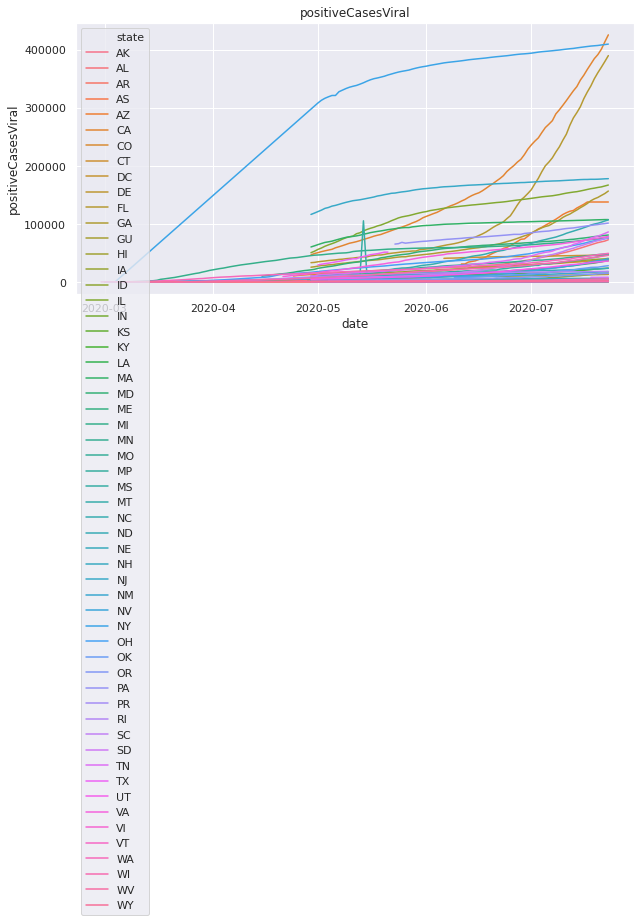

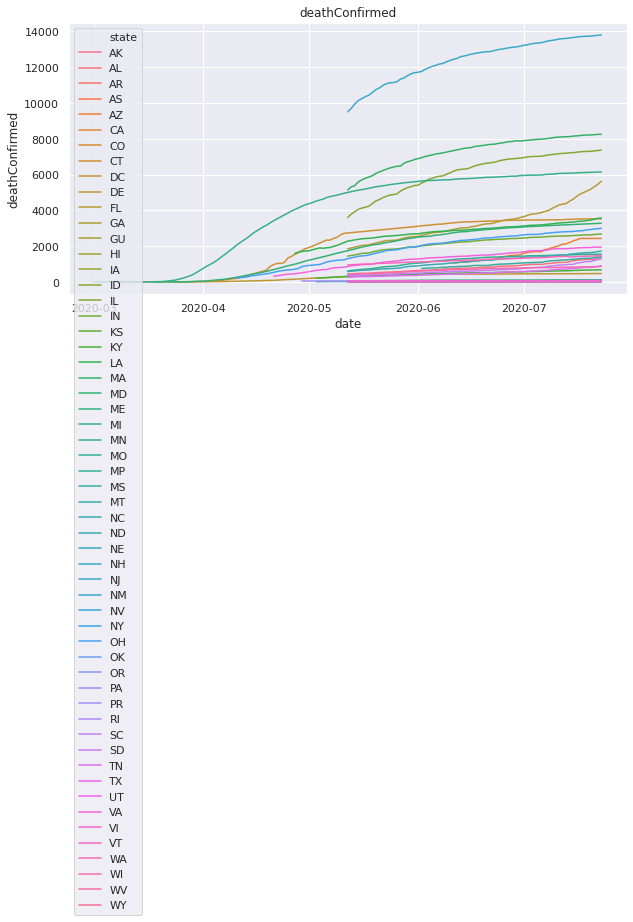

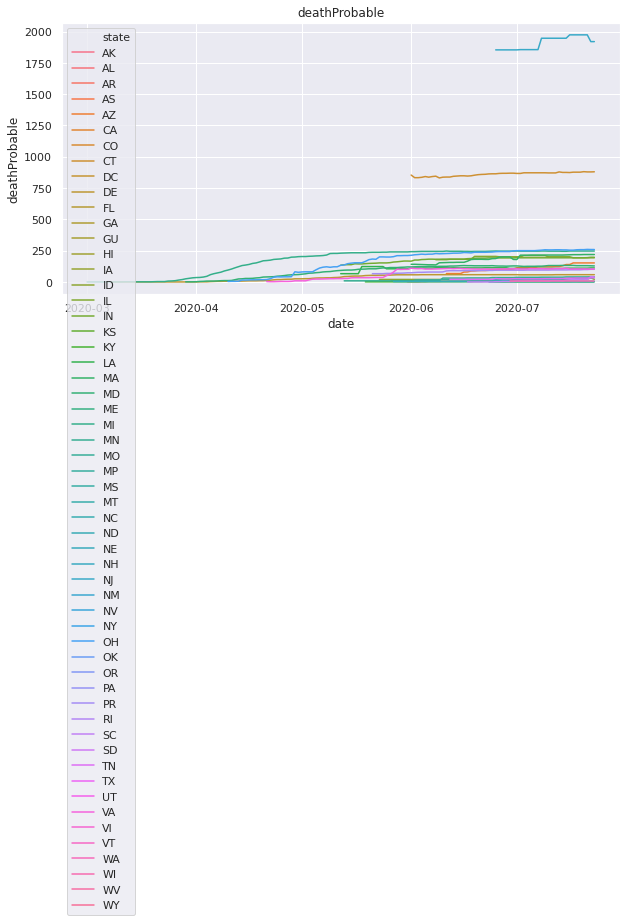

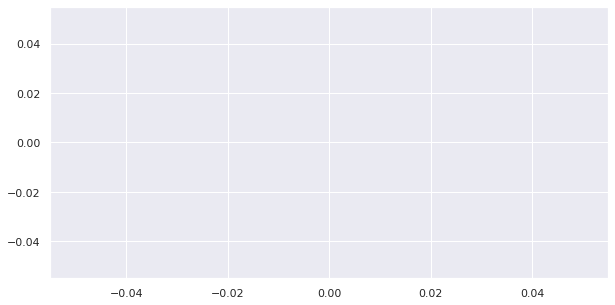

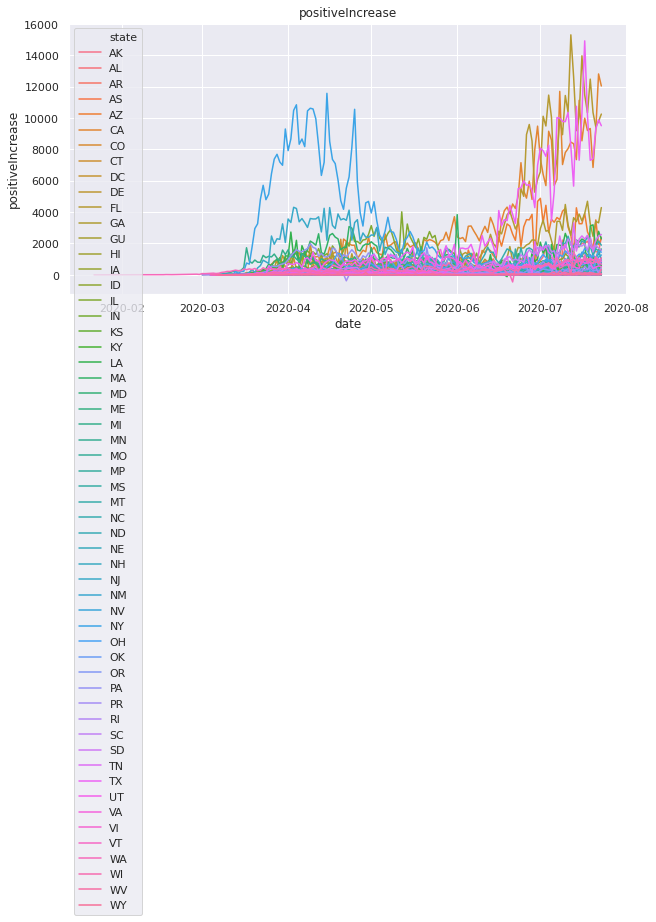

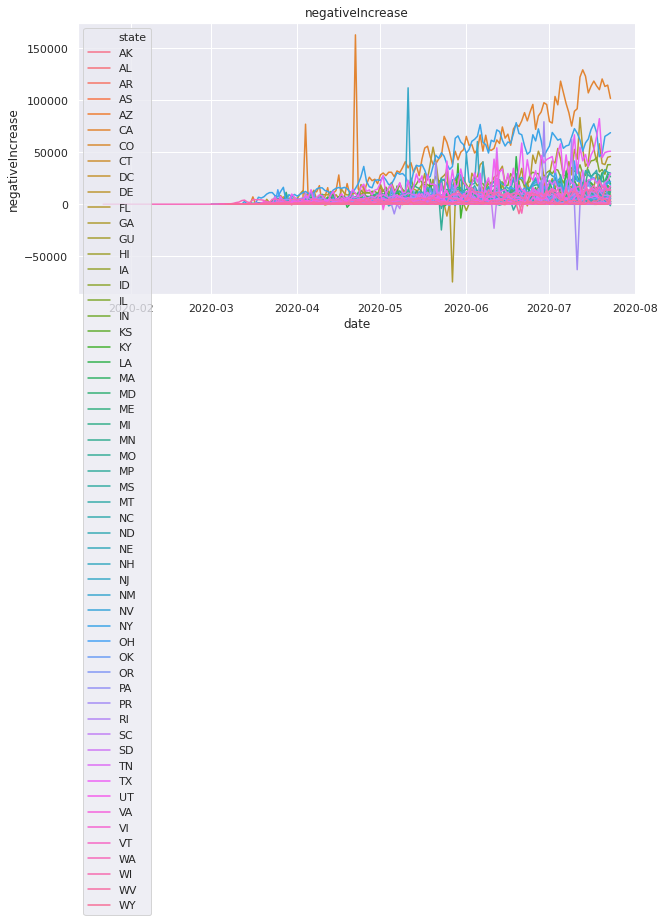

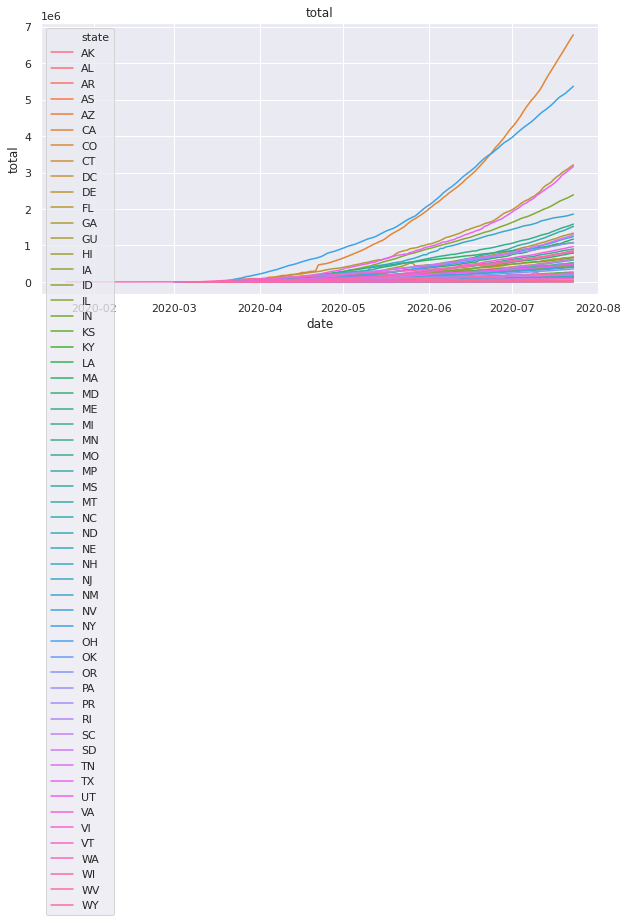

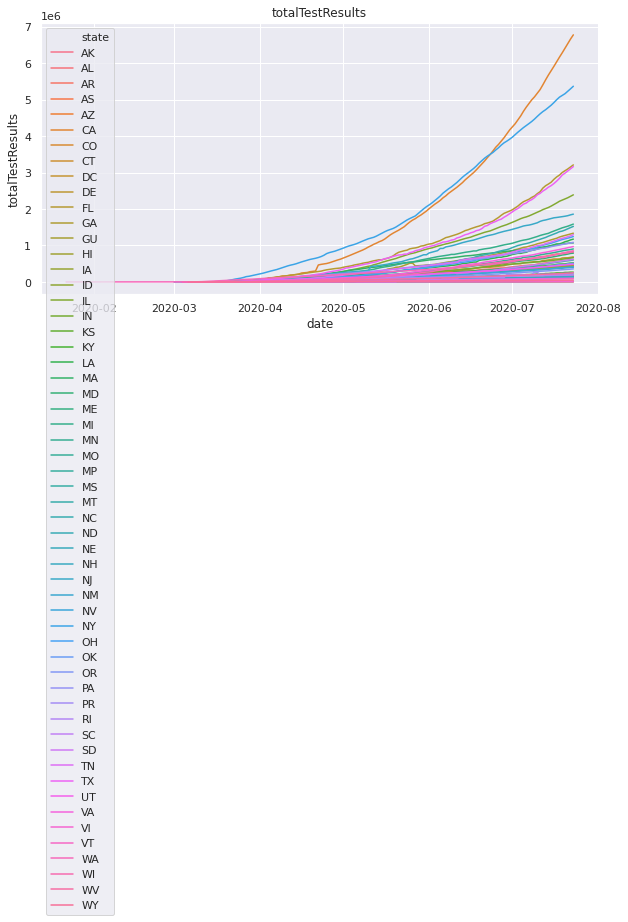

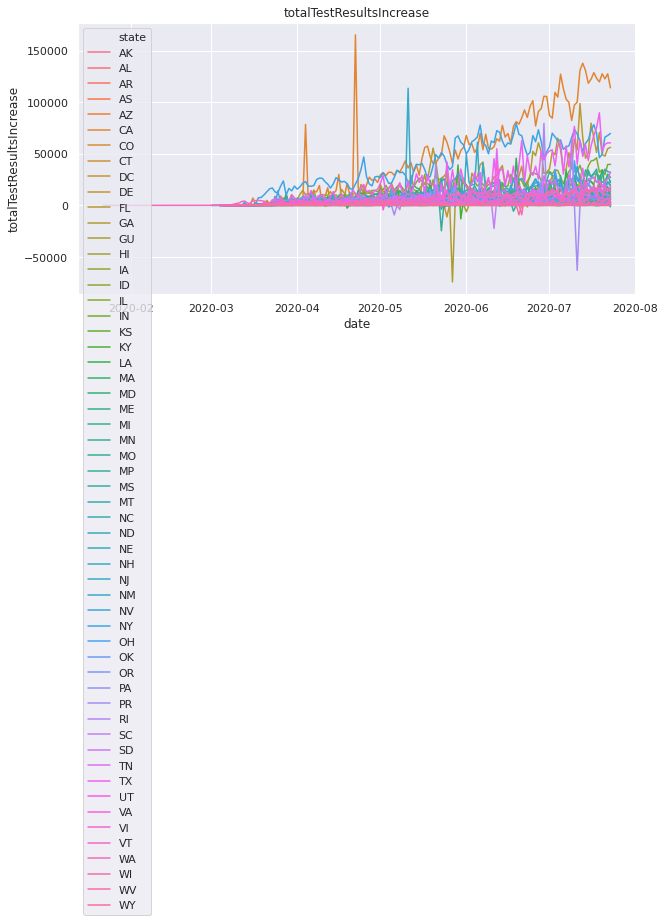

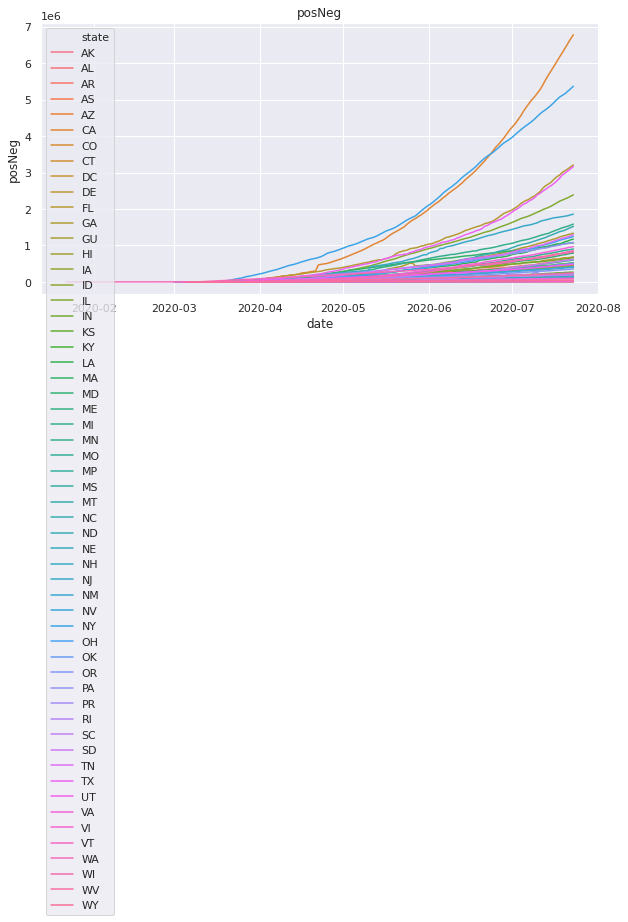

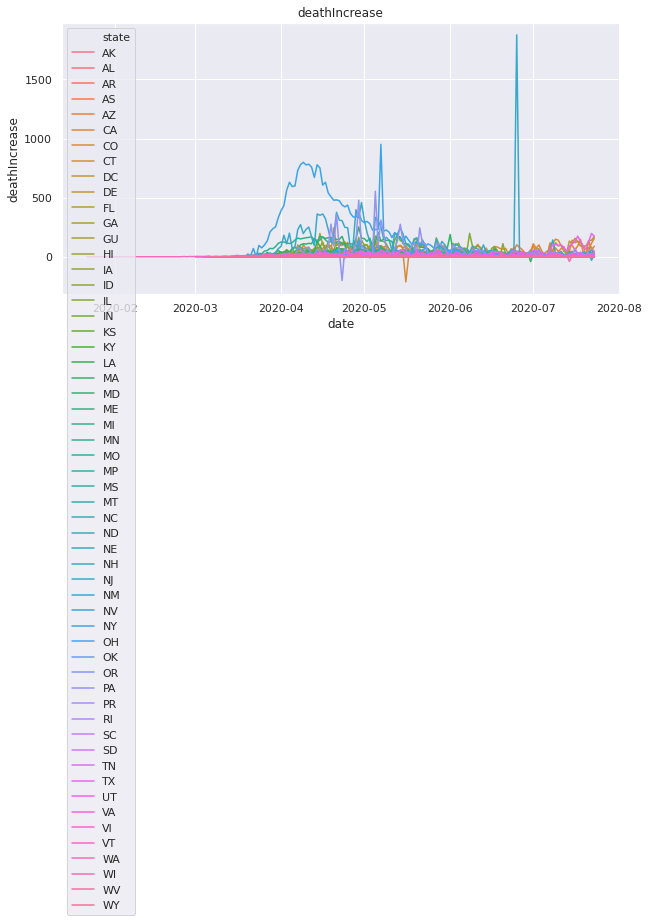

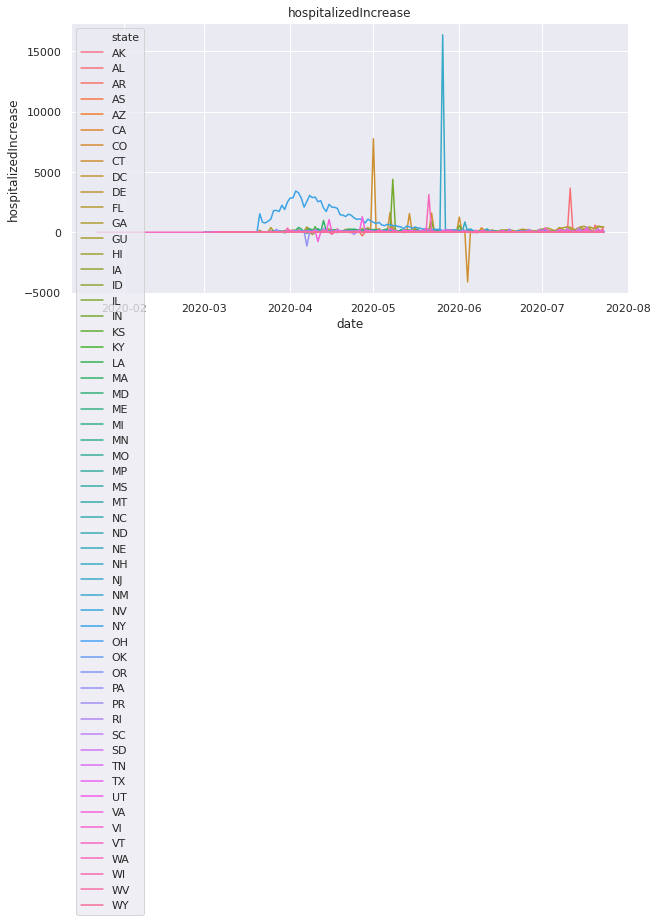

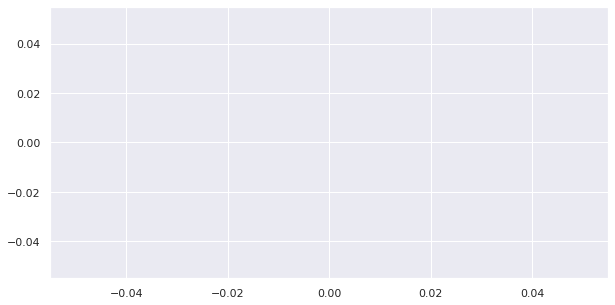

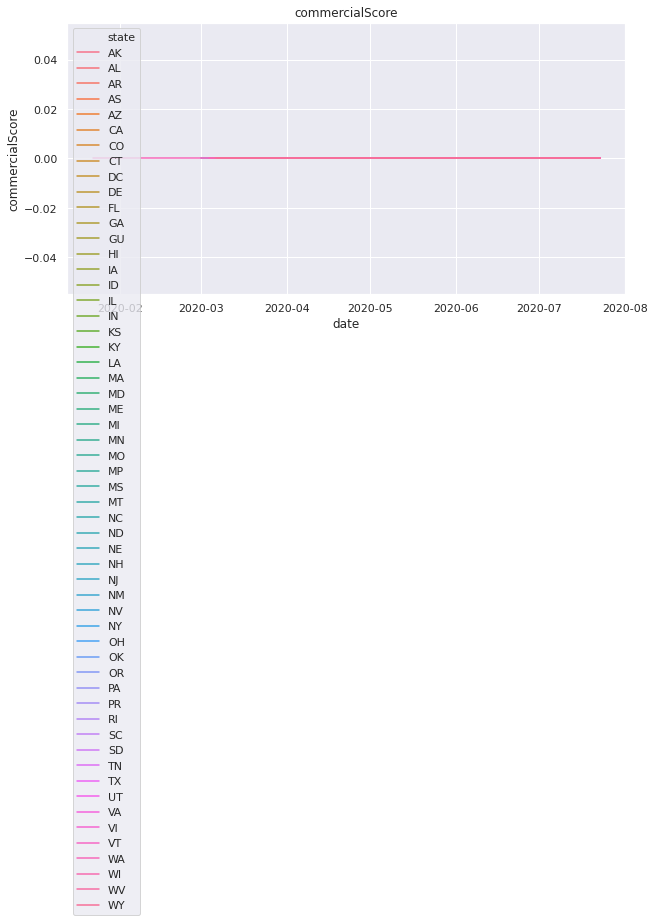

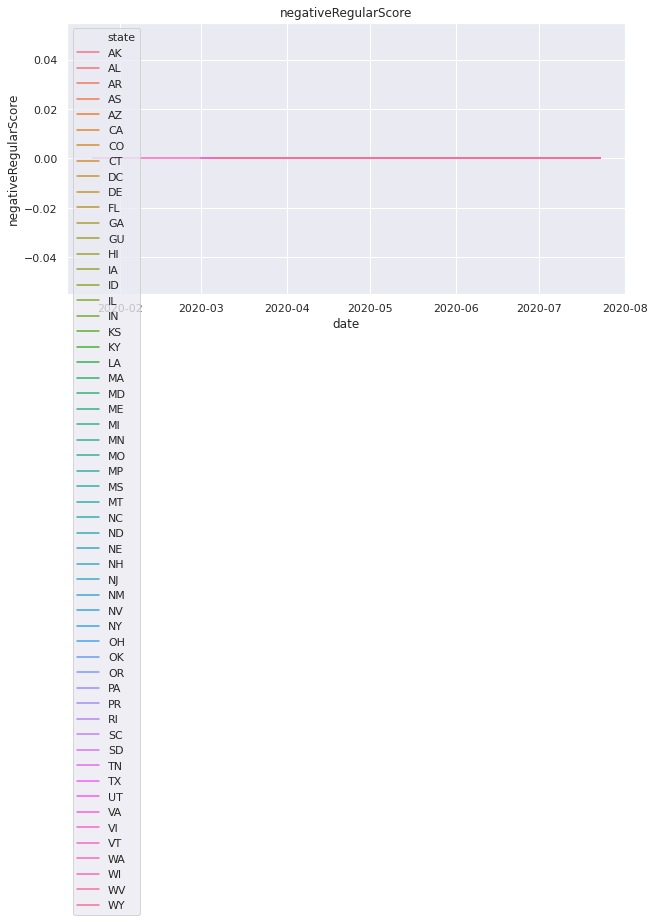

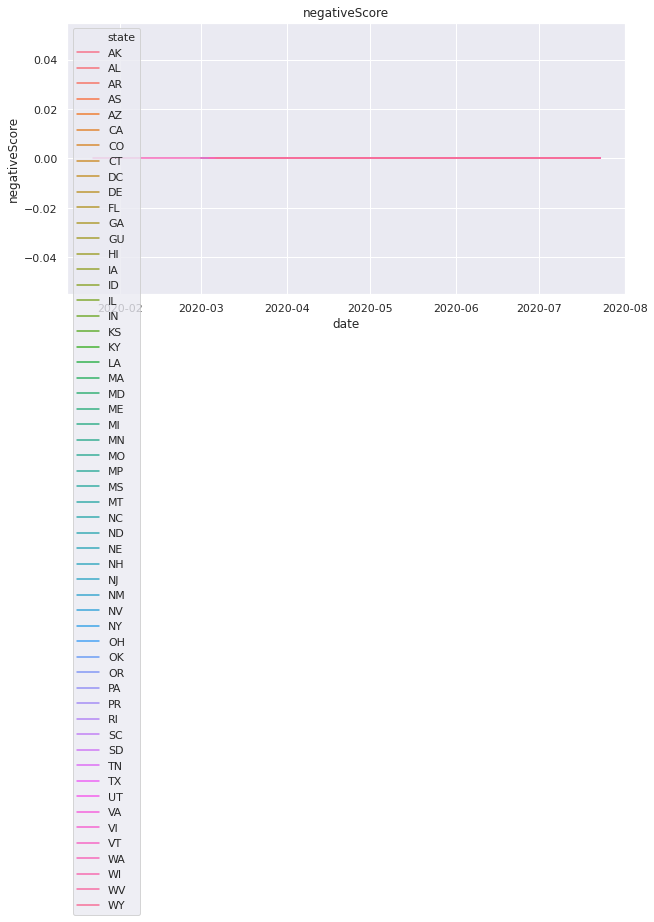

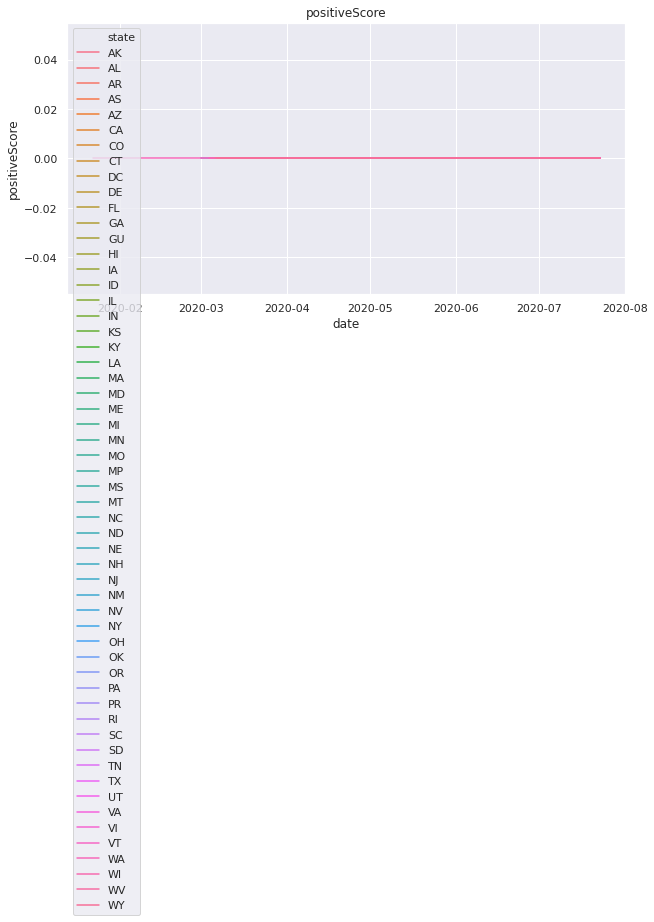

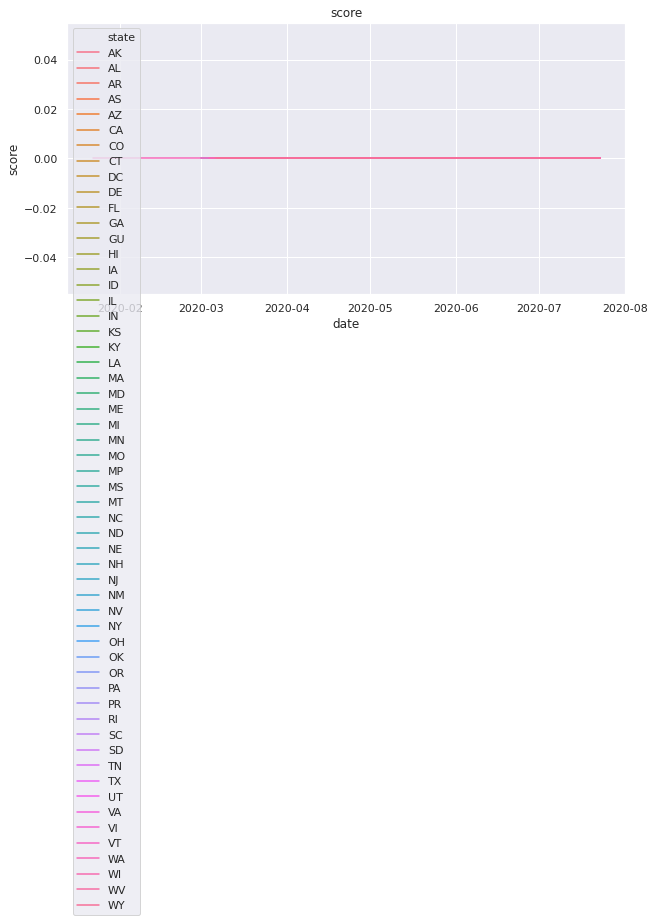

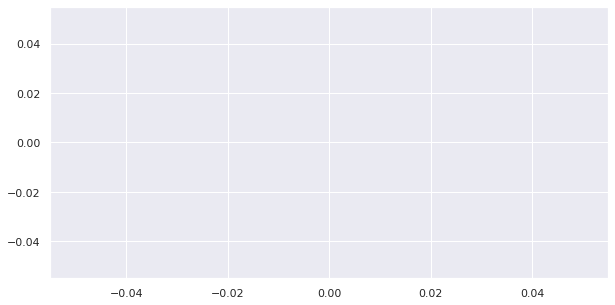

In [7]:
for col in df.columns:
    try:
        plt.figure(figsize=(10,5))
        sns.lineplot(x='date', y=col, hue='state', data=df.reset_index())
        plt.title(col)
    except:
        pass

### States info

In [10]:
url = "https://covidtracking.com/api/states/info"

response = requests.request("GET", url, headers={}, data={})

json_data = json.loads(response.text)
df = pd.DataFrame(json_data)
df.head()

,state,notes,covid19Site,covid19SiteSecondary,covid19SiteTertiary,twitter,covid19SiteOld,name,fips,pui,pum
0,AK,Negatives = (Totals – Positives)\nPositives oc...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,https://alaska-dhss.maps.arcgis.com/apps/opsda...,@Alaska_DHSS,http://dhss.alaska.gov/dph/Epi/id/Pages/COVID-...,Alaska,02,,False
1,AL,Negatives = (Totals - Positives) \nPositives o...,https://alpublichealth.maps.arcgis.com/apps/op...,https://dph1.adph.state.al.us/covid-19/,,@alpublichealth,http://www.alabamapublichealth.gov/infectiousd...,Alabama,01,,False
2,AR,None,https://www.healthy.arkansas.gov/programs-serv...,https://adem.maps.arcgis.com/apps/opsdashboard...,,@adhpio,https://www.healthy.arkansas.gov/programs-serv...,Arkansas,05,,False
3,AS,AS does not have a regularly updated data sour...,https://www.americansamoa.gov/covid-19-advisories,https://www.facebook.com/amsamgov/,,,http://www.samoagovt.ws/2020/03/ministry-of-he...,American Samoa,60,,False
4,AZ,"Negative = Total - Positive.\nAs of May 8, Ari...",https://www.azdhs.gov/preparedness/epidemiolog...,https://tableau.azdhs.gov/views/Hospitalizatio...,https://tableau.azdhs.gov/views/ExternalEMReso...,@azdhs,https://www.azdhs.gov/preparedness/epidemiolog...,Arizona,04,,False


### US Current

In [11]:
url = "http://covidtracking.com/api/us"

response = requests.request("GET", url, headers={}, data={})

json_data = json.loads(response.text)
df = pd.DataFrame(json_data)
df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200725,56,4158341,46477342,3377,59227,291347,10380,13279,2729,...,2020-07-25T00:00:00Z,50639060,50635683,50635683,1037,1992,732176,65413,797589,ea28b353271e8d21ff5f3b189169c0d974de8b29


### US Daily

In [12]:
url = "https://covidtracking.com/api/us/daily"

response = requests.request("GET", url, headers={}, data={})

json_data = json.loads(response.text)
df = pd.DataFrame(json_data)
df.head(4)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20200725,56,4158341,46477342,3377.0,59227.0,291347.0,10380.0,13279.0,2729.0,...,2020-07-25T00:00:00Z,50639060,50635683,50635683,1037,1992,732176,65413,797589,ea28b353271e8d21ff5f3b189169c0d974de8b29
1,20200724,56,4092928,45745166,3409.0,59670.0,289355.0,10405.0,13182.0,2712.0,...,2020-07-24T00:00:00Z,49841503,49838094,49838094,1178,3026,854645,75193,929838,5a28d1fb68592ad25bd4746557e1f68250423dea
2,20200723,56,4017735,44890521,3179.0,59885.0,286329.0,10418.0,12933.0,2472.0,...,2020-07-23T00:00:00Z,48911435,48908256,48908256,1039,2500,753372,71027,824399,1d8eb95c208f9afdd53bc9946b37be590b17a635
3,20200722,56,3946708,44137149,3051.0,59675.0,283829.0,10457.0,12790.0,2440.0,...,2020-07-22T00:00:00Z,48086908,48083857,48083857,1117,2248,726352,69150,795502,c28c2ce1af7dcb4a6dfc783c222acb7387b19277
